In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [7]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .34/5
hours = 5
time_in_seconds = 4590#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        #"Precipitation rate [s-1]" : 1.5e-5,
        "Zhang Initial Condition for Reaction 2 overpotential [V]":  0.005,
        "Bruggeman Constant [-]": 0,
        "Precipitation rate [s-1]": 0,
        #"Initial Li Concentration [g]": 216.41121602799998 
    }
)
params.process_model(model)
sim0 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-12, 
        rtol=1e-6, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        root_method = 'lm',
        root_tol = 1e-6, 
        #dt_max = 1e-7
    ),
)
sim0.solve(np.linspace(0, time_in_seconds, 1000))


The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
At t = 9.3258e-07 and h = 1.18672e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.18671e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.1867e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.18673e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.18667e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.1867e-157, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 9.3258e-07 and h = 1.18682e-157, the corrector convergence failed repeatedly or with |h| = hmin.

SolverError: Maximum number of decreased steps occurred at t=0.0. Try solving the model up to this time only or reducing dt_max (currently, dt_max=0.00014161805848818932).

In [ ]:
voltage = sim0.solution['Terminal voltage [V]'].entries
Ah = abs(current)*sim0.solution.t/3600
plt.plot(Ah,voltage)
notify

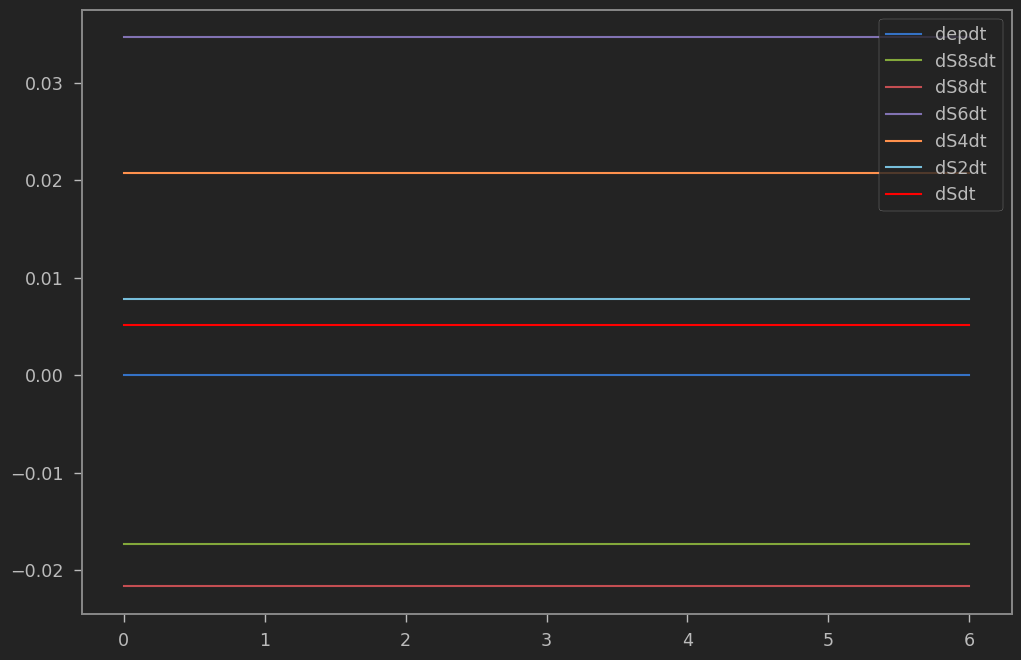

In [4]:
plt.plot(sim0.solution.t, sim0.solution["depdt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dS8sdt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dS8dt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dS6dt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dS4dt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dS2dt"].entries)
plt.plot(sim0.solution.t, sim0.solution["dSdt"].entries,color='red')

plt.legend(["depdt","dS8sdt","dS8dt","dS6dt","dS4dt","dS2dt","dSdt"])

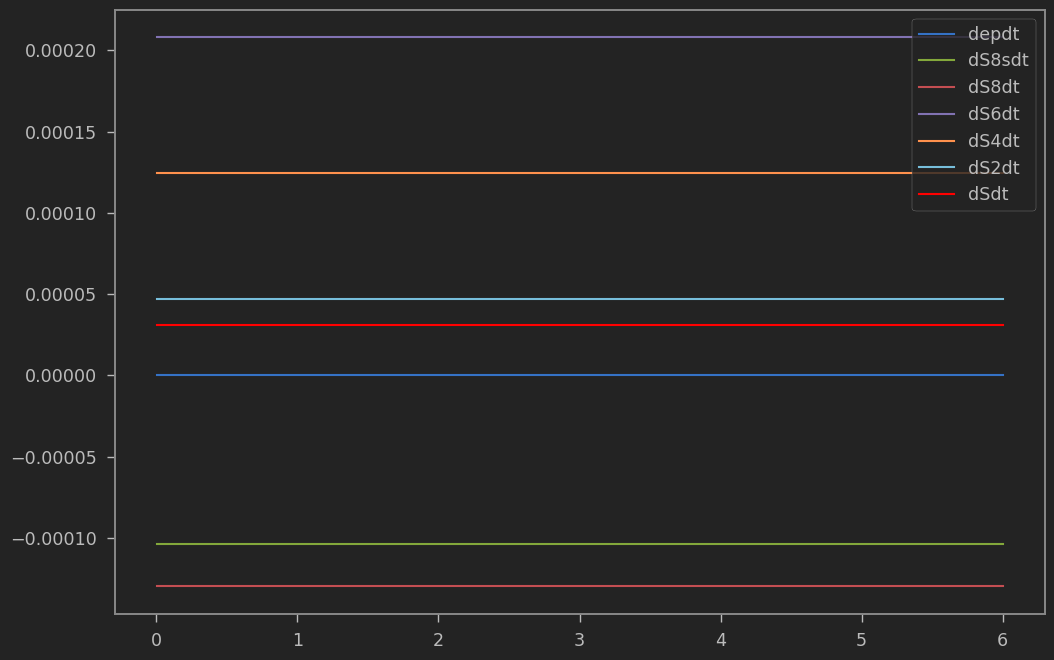

In [5]:
dt = sim0.solution.t[1:] - sim0.solution.t[0:-1]
t = sim0.solution.t[1:]
plt.plot(t, sim0.solution["depdt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dS8sdt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dS8dt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dS6dt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dS4dt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dS2dt"].entries[1:]*dt)
plt.plot(t, sim0.solution["dSdt"].entries[1:]*dt,color='red')

plt.legend(["depdt","dS8sdt","dS8dt","dS6dt","dS4dt","dS2dt","dSdt"])

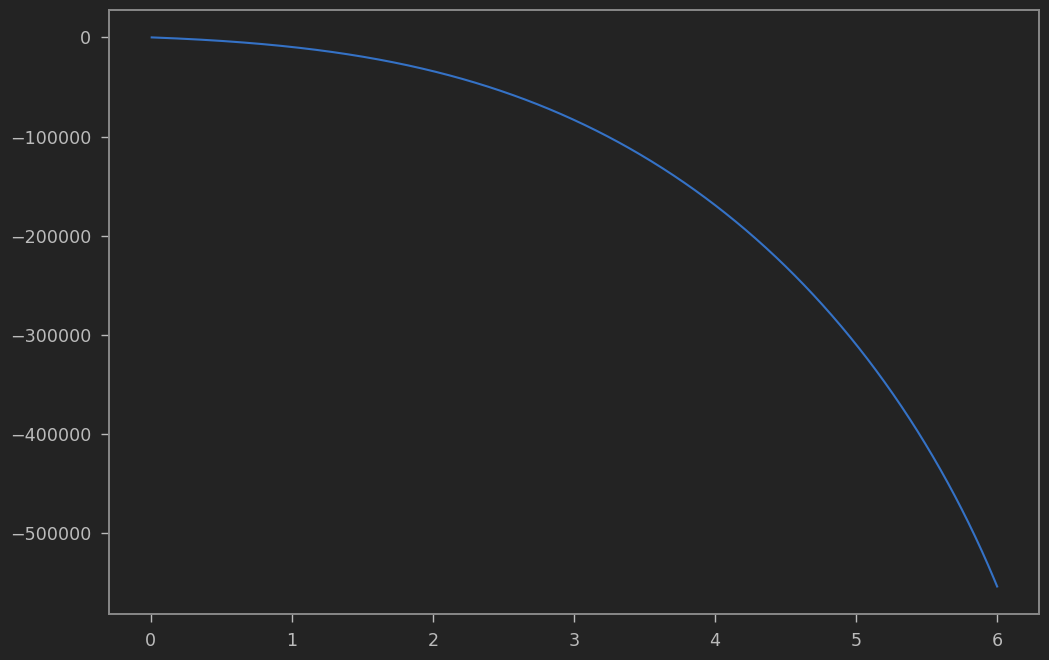

In [25]:
plt.plot(t, (S2[0] +np.cumsum(sim0.solution["dS2dt"].entries[1:]*dt))/S2[0])

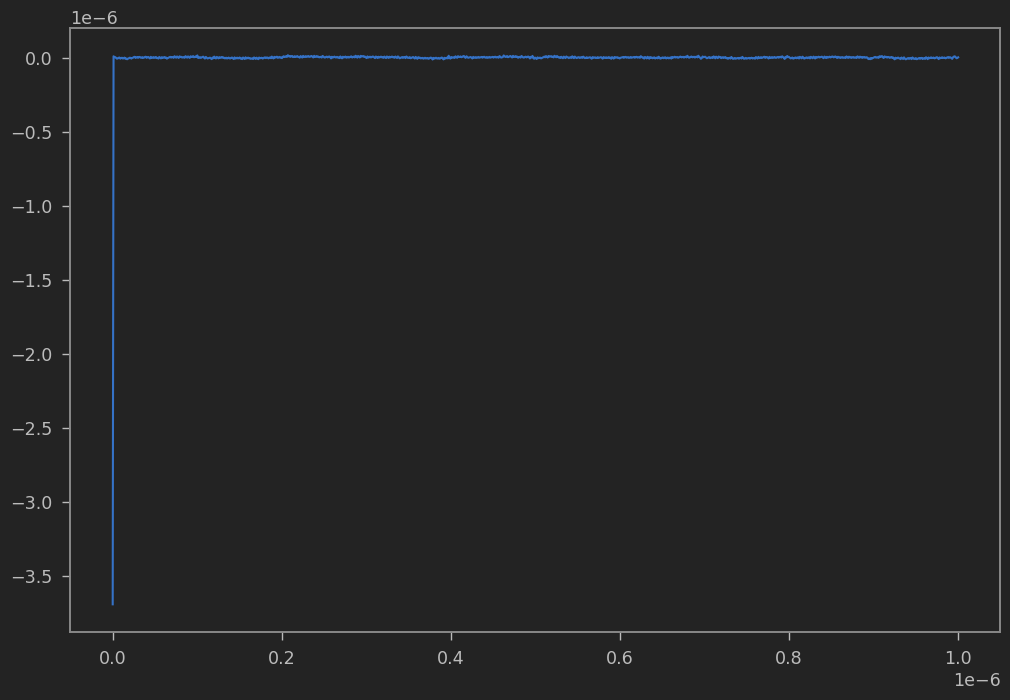

In [10]:
Rs = sim0.solution["Algebraic condition"].entries
I = .34/5
plt.plot(sim0.solution.t,Rs)

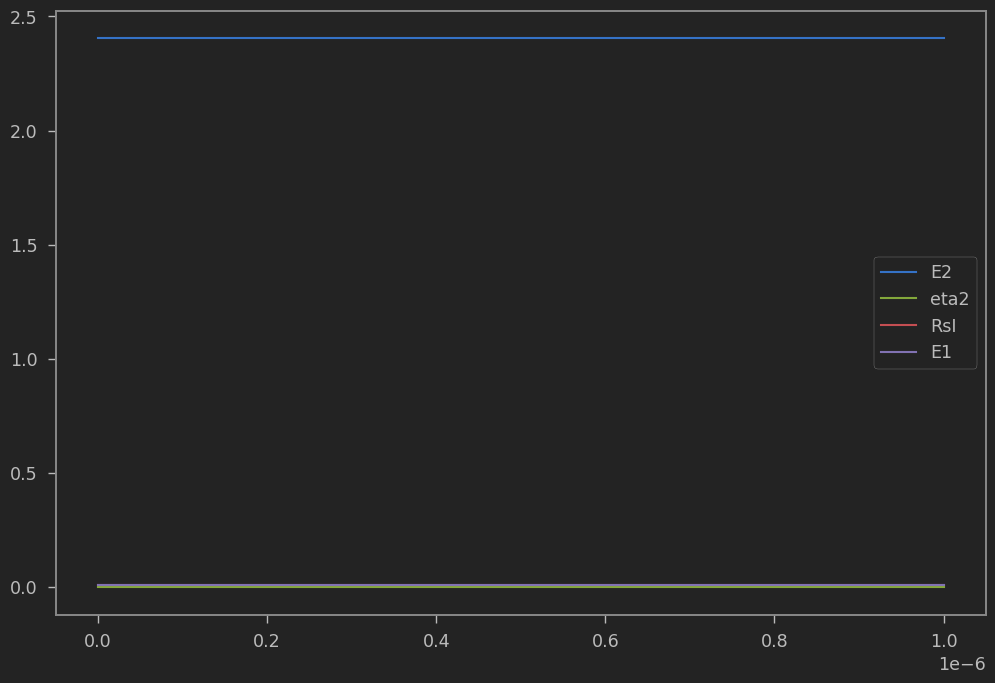

In [6]:

E2 = sim0.solution["Reaction 2 potential [V]"].entries
eta2 = sim0.solution["Reaction 2 overpotential [V]"].entries
E1 = sim0.solution["Reaction 1 potential [V]"].entries
Rs = sim0.solution["Electrolyte Resistance [S-1]"].entries
I = .34/5
plt.plot(sim0.solution.t,E2)
plt.plot(sim0.solution.t,eta2)
plt.plot(sim0.solution.t,Rs*I)
plt.plot(sim0.solution.t,E1)
plt.legend(['E2','eta2','RsI','E1'])

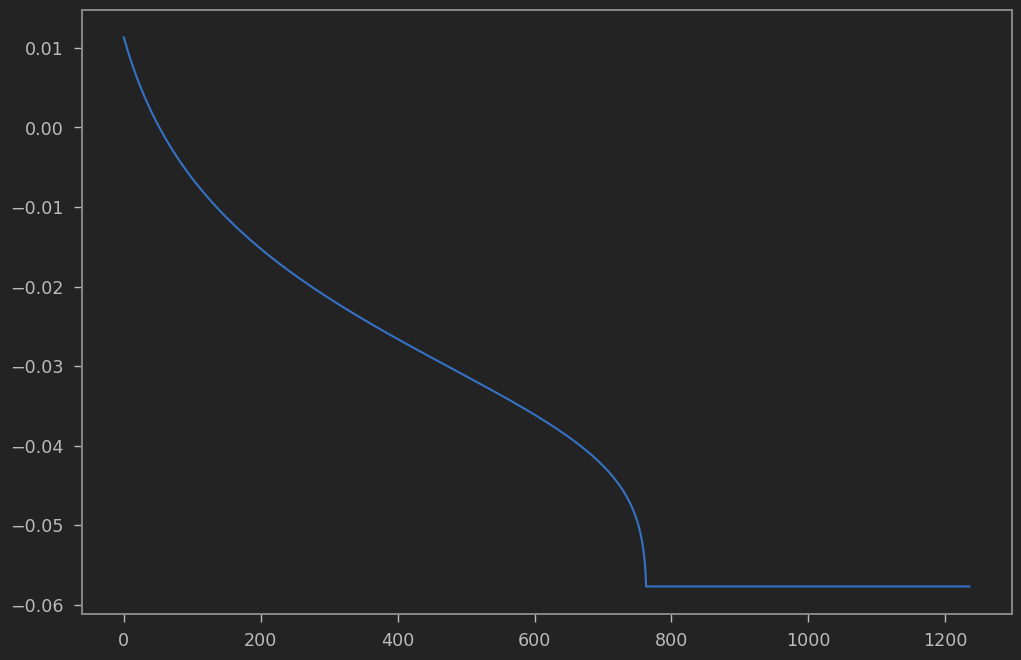

In [7]:
plt.plot(eta2)

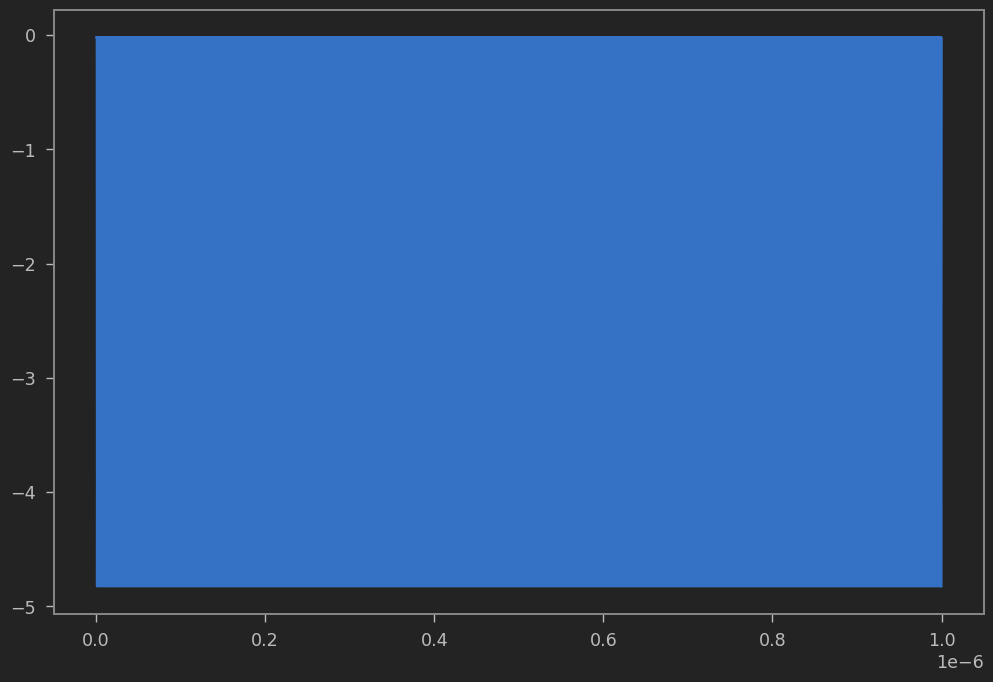

In [6]:
Rs = sim0.solution["Algebraic condition"].entries
I = .34/5
plt.plot(sim0.solution.t,Rs)

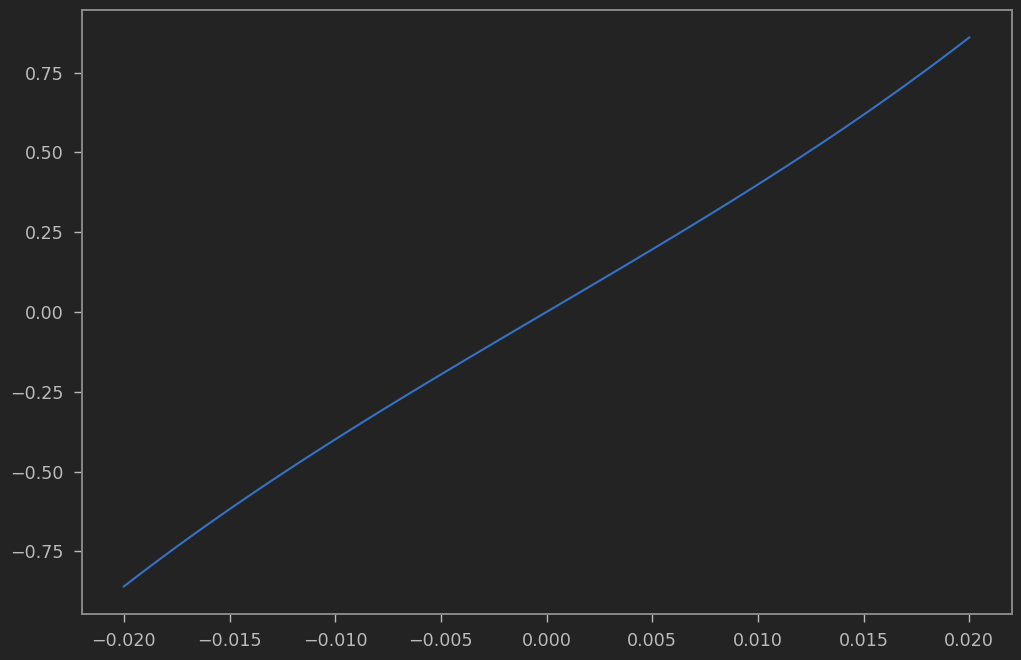

In [8]:
x = np.linspace(-0.02,0.02,100)
beta = 9.649e4/(298*8.3145)
y = np.sinh(beta*x)
plt.plot(x,y)

In [26]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_ks_temp()
current = .36/5
hours = 75
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        #"Precipitation rate [s-1]" : 1.5e-5,
        "Zhang Initial Condition for Reaction 2 overpotential [V]":  0.012396349308440097,
        "Bruggeman Constant [-]": 0,
        "Precipitation rate [s-1]": 0
        #"Initial Li Concentration [g]": 216.41121602799998 
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))

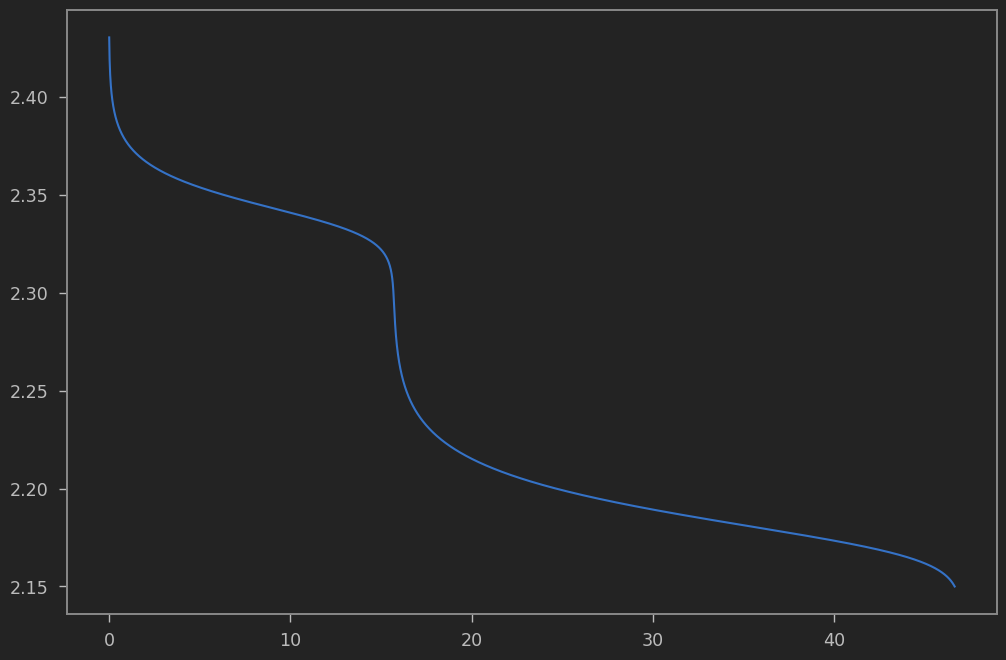

In [27]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(sim1.solution.t/3600,voltage)
notify

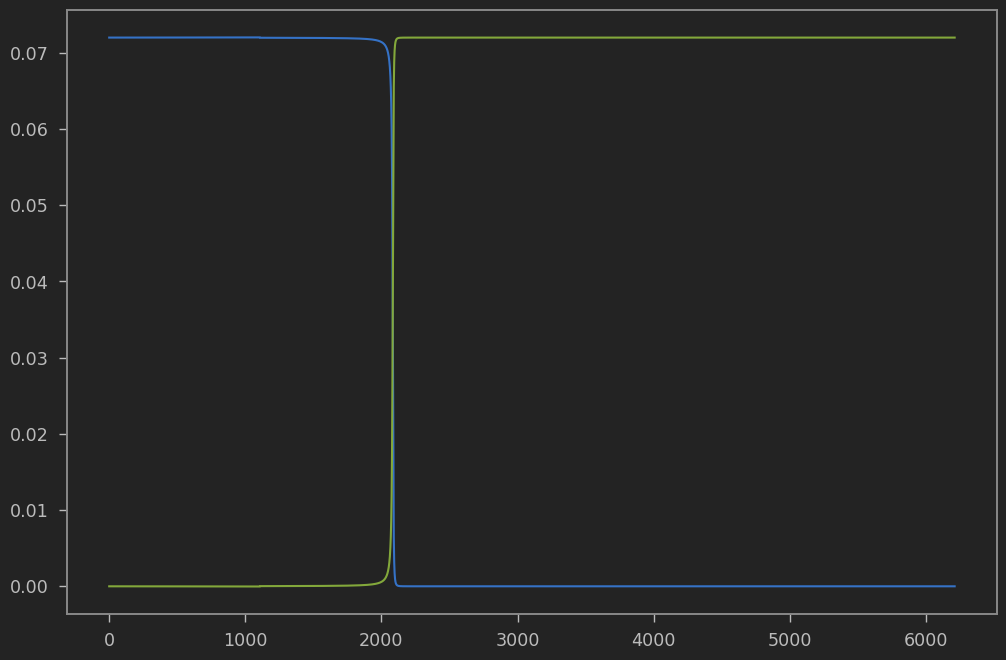

In [28]:
plt.plot(sim1.solution["High plateau current [A]"].entries[10:])
plt.plot(sim1.solution["Low plateau current [A]"].entries[10:])

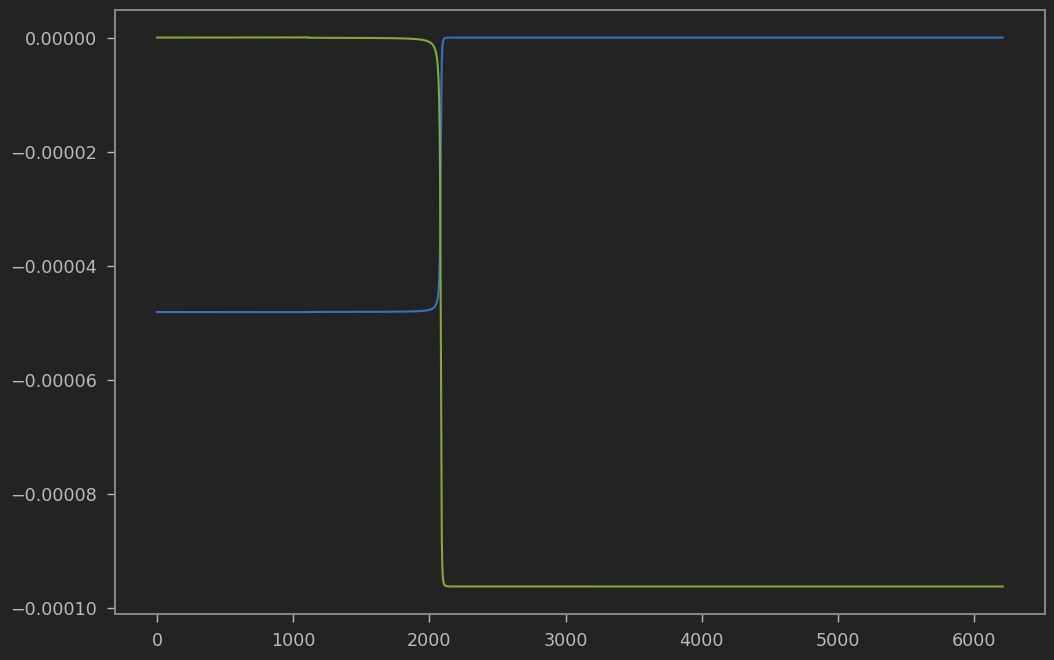

In [29]:

plt.plot(sim1.solution["High plateau over-potential [V]"].entries[10:])
plt.plot(sim1.solution["Low plateau over-potential [V]"].entries[10:])

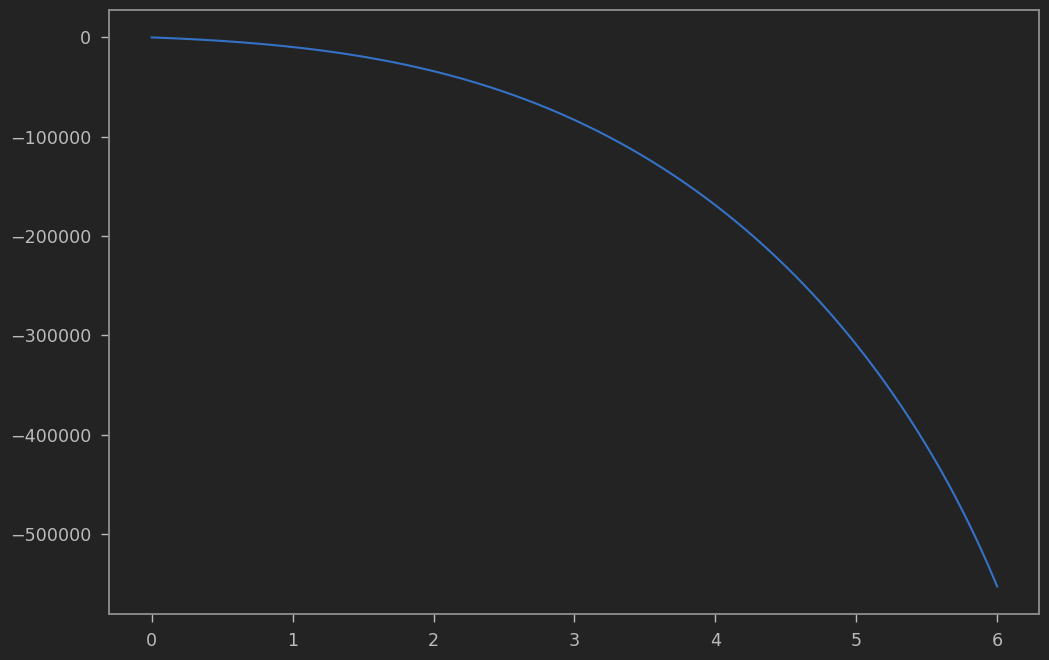

In [22]:
S8s = sim0.solution["S8(s) [g]"].entries
S8 = sim0.solution["S8 [g]"].entries
S6 = sim0.solution["S6 [g]"].entries
S4 = sim0.solution["S4 [g]"].entries
S2 = sim0.solution["S2 [g]"].entries
S1 = sim0.solution["S [g]"].entries

#plt.plot(sim0.solution.t,S8s/S8s[0])
#plt.plot(sim0.solution.t,S8/S8[0])
#plt.plot(sim0.solution.t,S6/S6[0])
#plt.plot(sim0.solution.t,S4/S4[0])
plt.plot(sim0.solution.t,S2/S2[0])
#plt.plot(sim0.solution.t,S1/S1[0])

In [14]:
print(S8s[-1])
print(S8[-1])
print(S6[-1])
print(S4[-1])
print(S2[-1])
print(S1[-1])

670.0000012179041
100.00000075977857
8.200008347080725
0.0055837073109594485
4.3580730035369063e-08
1.519364733393839e-05


In [77]:
eta20 = sim0.solution["Reaction 2 overpotential [V]"].entries
eta20[0]

0.011533347872887834

In [56]:
sim0.solution["Terminal voltage [V]"].entries

array([2.41304398, 2.41274174, 2.41243086, ..., 2.34394847, 2.34394732,
       2.34394847])

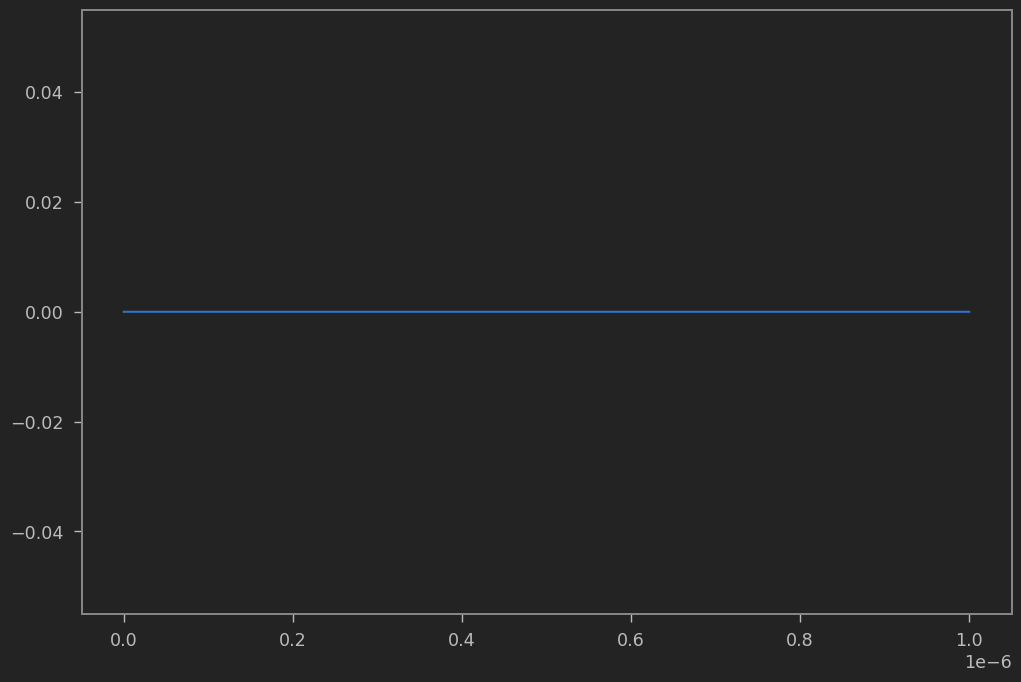

In [15]:
plt.plot(sim0.solution.t,sim0.solution["Precipitation rate [s-1]"].entries)

In [46]:
i2 = sim0.solution["Reaction 2 current [A]"].entries
i3 = sim0.solution["Reaction 3 current [A]"].entries
i4 = sim0.solution["Reaction 4 current [A]"].entries
i5 = sim0.solution["Reaction 5 current [A]"].entries
i6 = sim0.solution["Reaction 6 current [A]"].entries
av = sim0.solution["Specific Surface Area [m-1]"].entries
print((i2[0]+i3[0]+i4[0]+i5[0]+i6[0])*av[0])
print(current/(0.29*4e-5))

0.0679999995760805
5862.068965517242


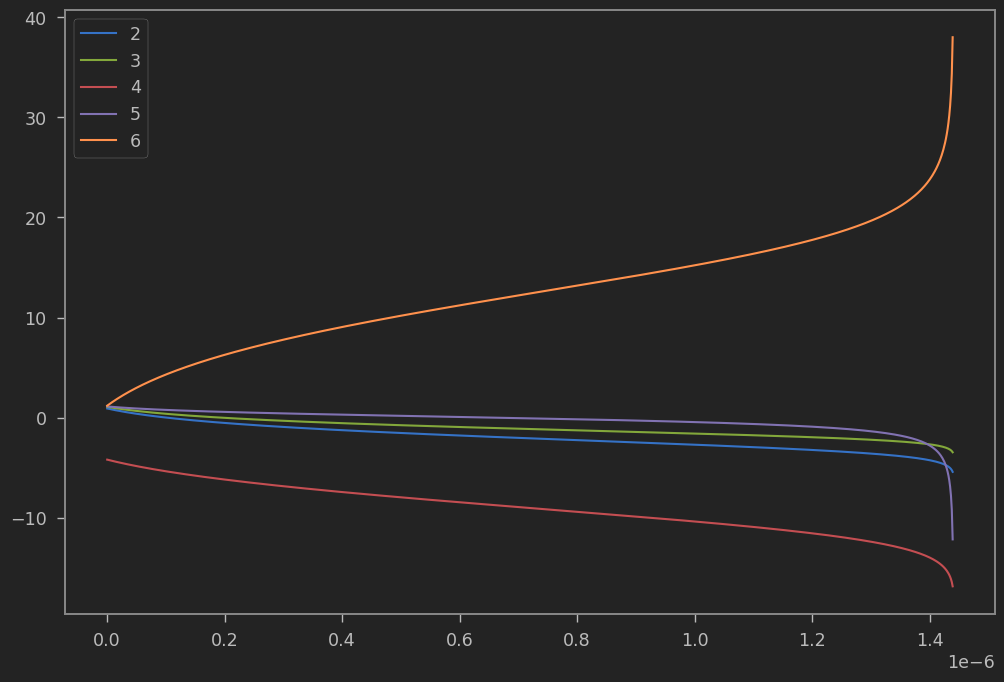

In [48]:
Ah = I*sim0.solution.t/3600
plt.plot(Ah,i2)
plt.plot(Ah,i3)
plt.plot(Ah,i4)
plt.plot(Ah,i5)
plt.plot(Ah,i6)
plt.legend([2,3,4,5,6])

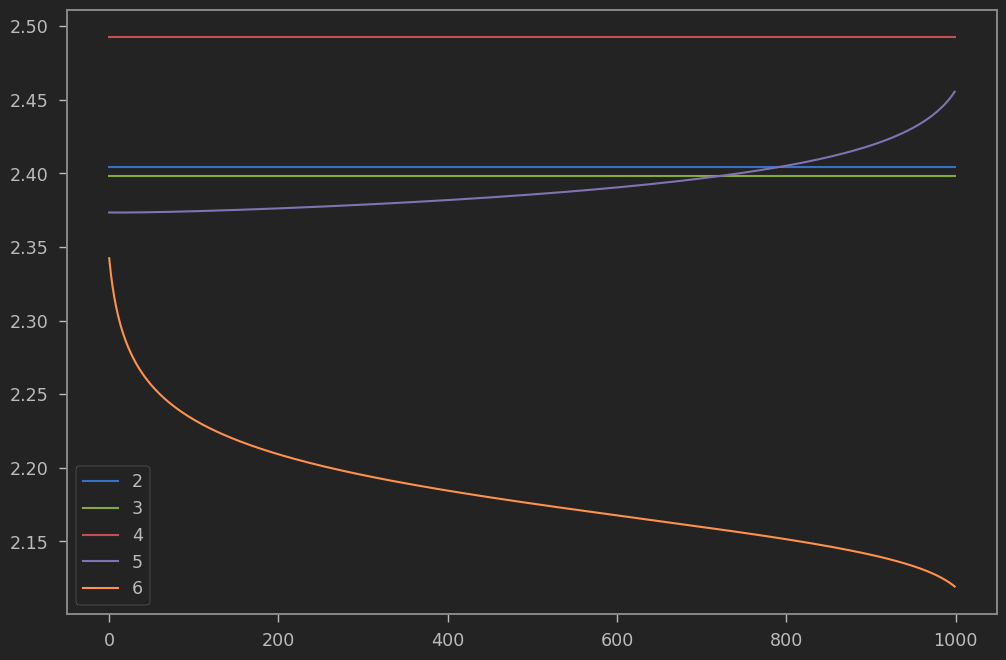

In [21]:
Rs0 = sim0.solution["Electrolyte Resistance [S-1]"].entries
V0 = sim0.solution["Terminal voltage [V]"].entries

E10 = sim0.solution["Reaction 1 potential [V]"].entries
E20 = sim0.solution["Reaction 2 potential [V]"].entries
E30 = sim0.solution["Reaction 3 potential [V]"].entries
E40 = sim0.solution["Reaction 4 potential [V]"].entries
E50 = sim0.solution["Reaction 5 potential [V]"].entries
E60 = sim0.solution["Reaction 6 potential [V]"].entries

eta20 = sim0.solution["Reaction 2 overpotential [V]"].entries
eta30 = sim0.solution["Reaction 3 overpotential [V]"].entries
eta40 = sim0.solution["Reaction 4 overpotential [V]"].entries
eta50 = sim0.solution["Reaction 5 overpotential [V]"].entries
eta60 = sim0.solution["Reaction 6 overpotential [V]"].entries
#plt.plot((E20 + eta20) + E10 + 3.45*Rs0)
plt.plot(E20)
plt.plot(E30)
plt.plot(E40)
plt.plot(E50)
plt.plot(E60)
plt.legend([2,3,4,5,6])

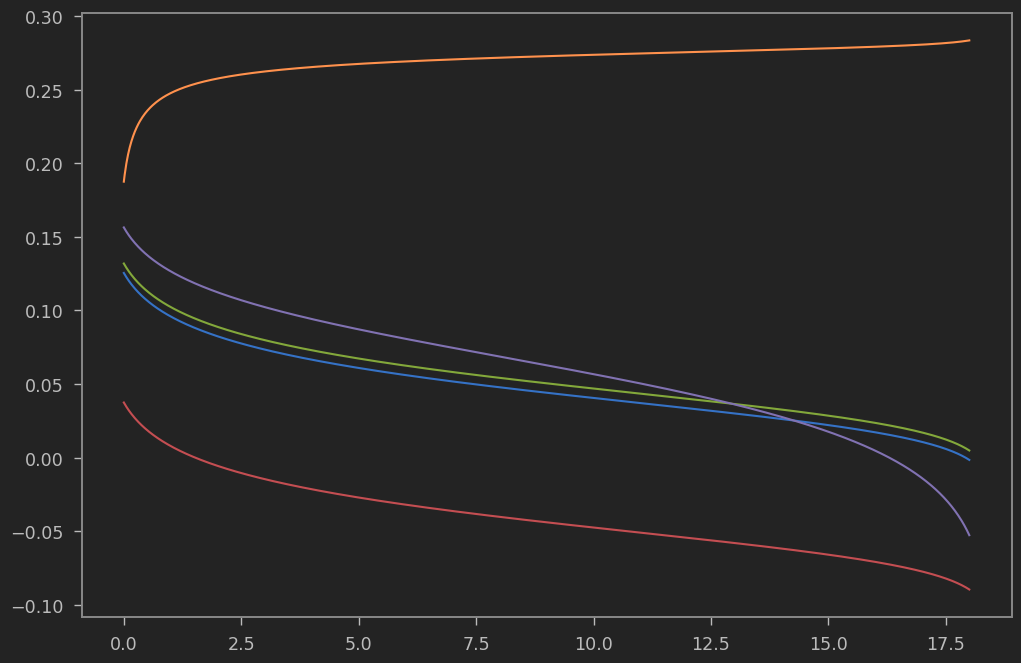

In [22]:
plt.plot(sim0.solution.t,eta20)
plt.plot(sim0.solution.t,eta30)
plt.plot(sim0.solution.t,eta40)
plt.plot(sim0.solution.t,eta50)
plt.plot(sim0.solution.t,eta60)

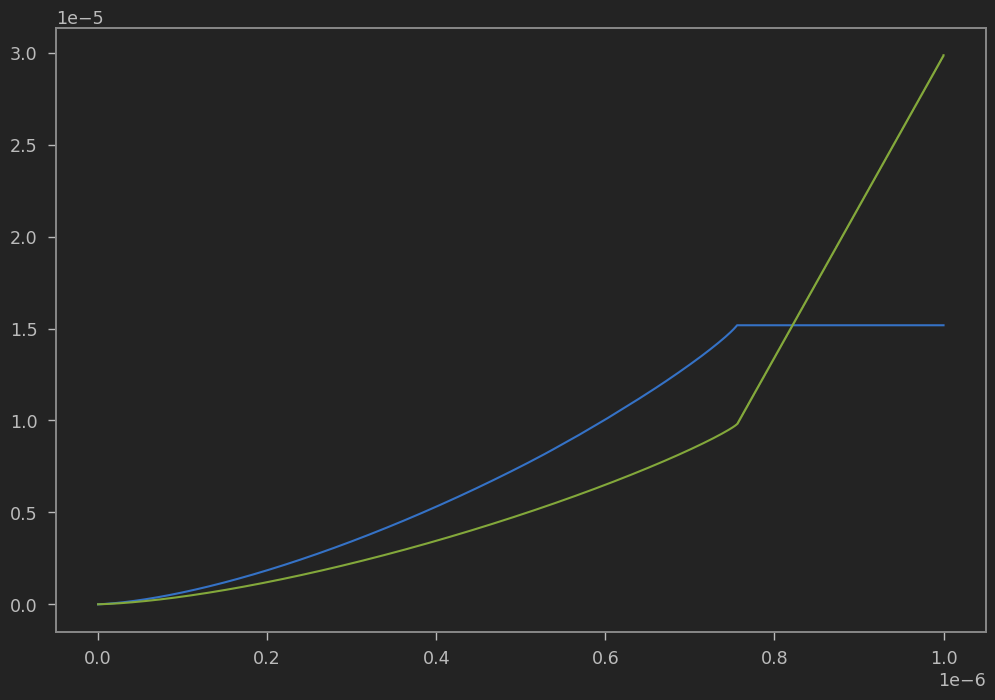

In [21]:
S8s = sim0.solution["S8(s) [g]"].entries
S8 = sim0.solution["S8 [g]"].entries
S6 = sim0.solution["S6 [g]"].entries
S4 = sim0.solution["S4 [g]"].entries
S2 = sim0.solution["S2 [g]"].entries
S1 = sim0.solution["S [g]"].entries

#plt.plot(sim0.solution.t,S8s/S8s[0])
#plt.plot(sim0.solution.t,S8/S8[0])
#plt.plot(sim0.solution.t,S6/S6[0])
#plt.plot(sim0.solution.t,S4/S4[0])
#plt.plot(sim0.solution.t,S2/S2[0])
plt.plot(sim0.solution.t,S1-S1[0])
av0 = 1e5
dt = 1e-9 
F = 9.649e4
plt.plot(sim0.solution.t, av0*dt*np.cumsum(i6)/F)

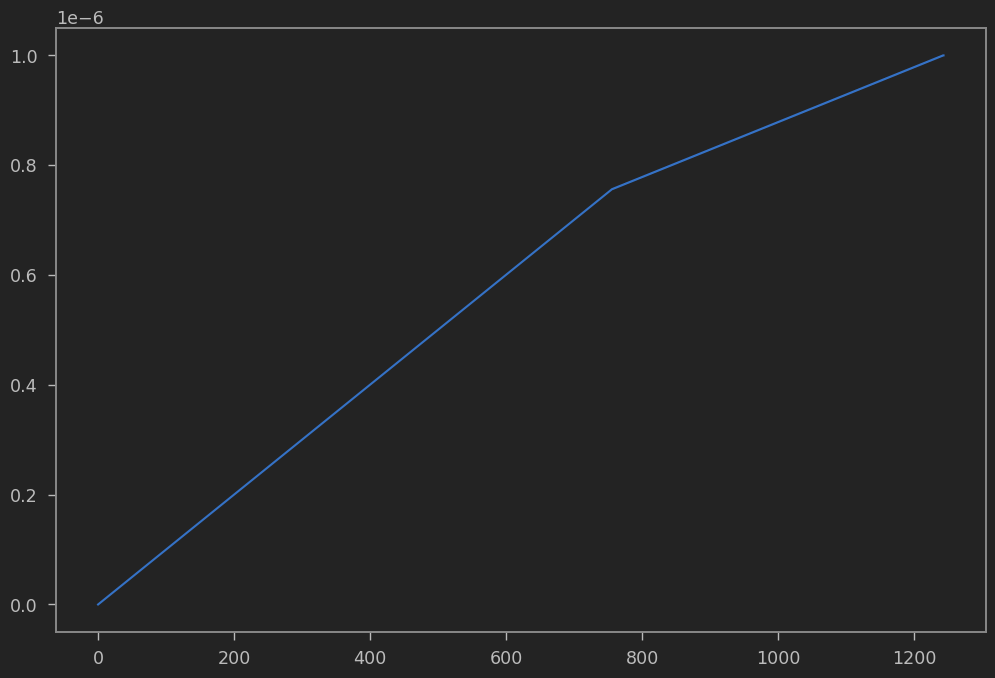

In [22]:
plt.plot(np.arange(len(sim0.solution.t)), sim0.solution.t)

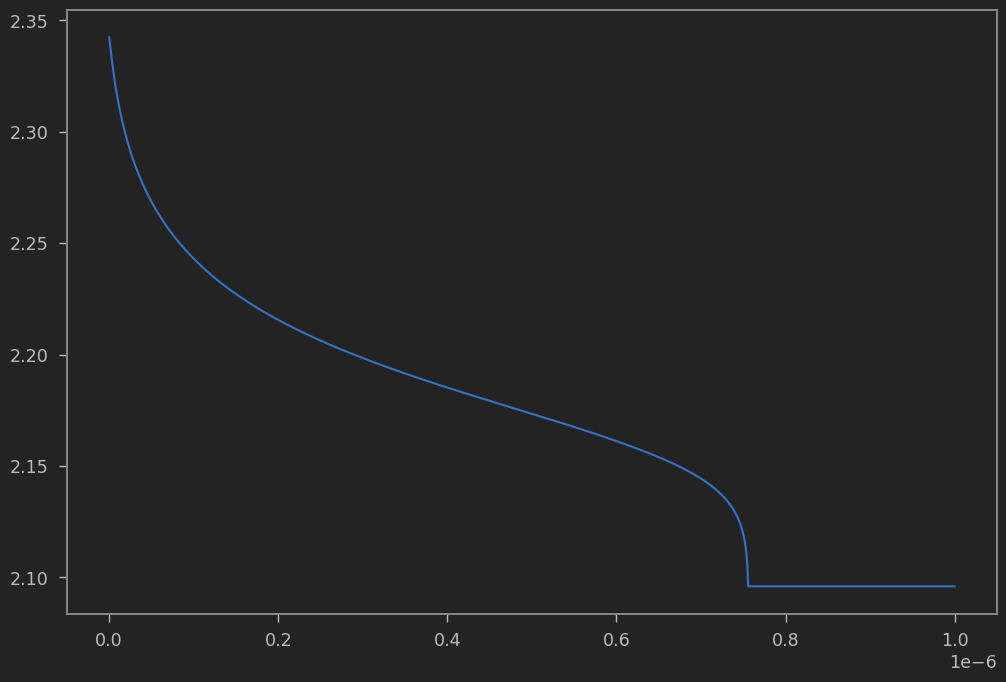

In [23]:
plt.plot(sim0.solution.t, sim0.solution[ "Reaction 6 potential [V]"].entries)

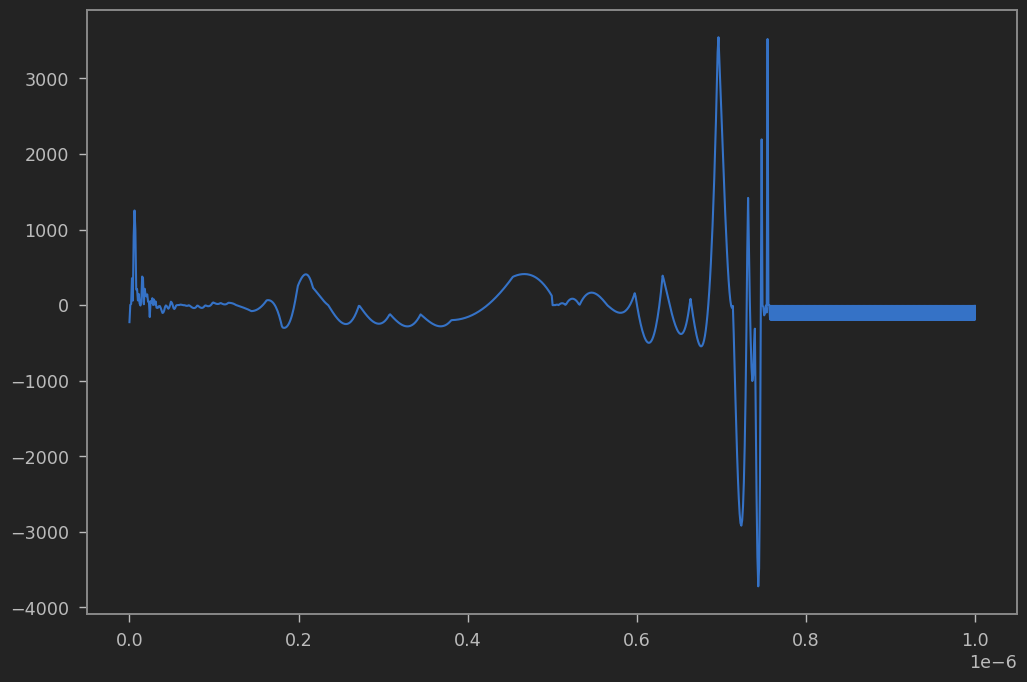

In [24]:
plt.plot(sim0.solution.t,sim0.solution["Algebraic condition"].entries)

In [30]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = -2.4*.15
hours = .0025
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Precipitation rate [s-1]" : 1.5e-5,
        "Zhang Initial Condition for Reaction 2 overpotential [V]":  0.317095133318479,
        #"Initial Li Concentration [g]": 216.41121602799998 
    }
)
params.process_model(model)
sim0 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-6, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim0.solve(np.linspace(0, time_in_seconds, 100))


The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


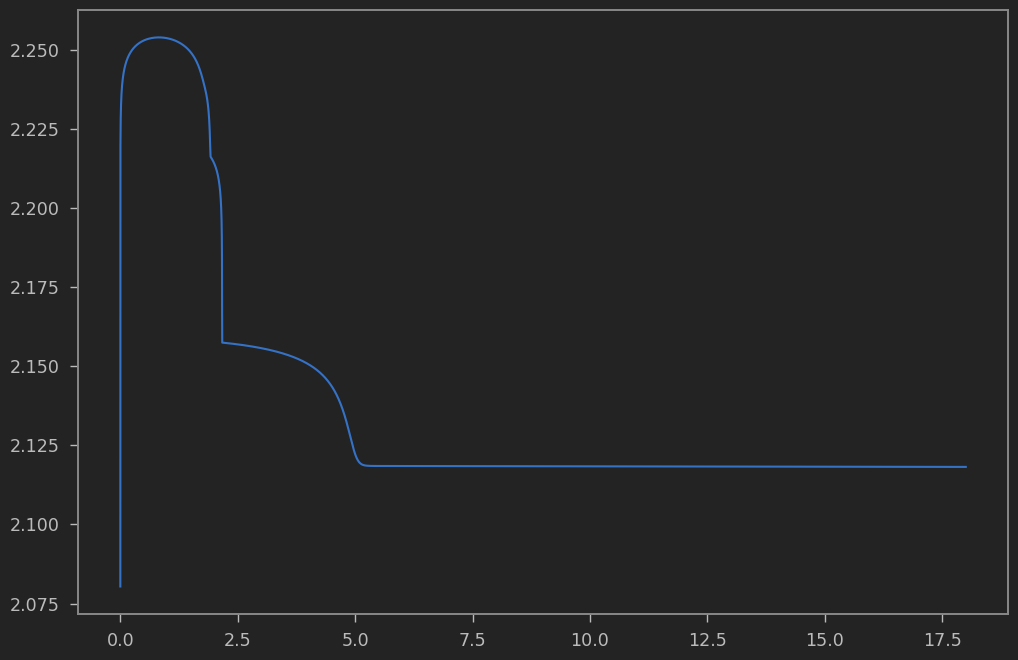

In [31]:
voltage = sim0.solution['Terminal voltage [V]'].entries
plt.plot(sim0.solution.t, voltage)
notify

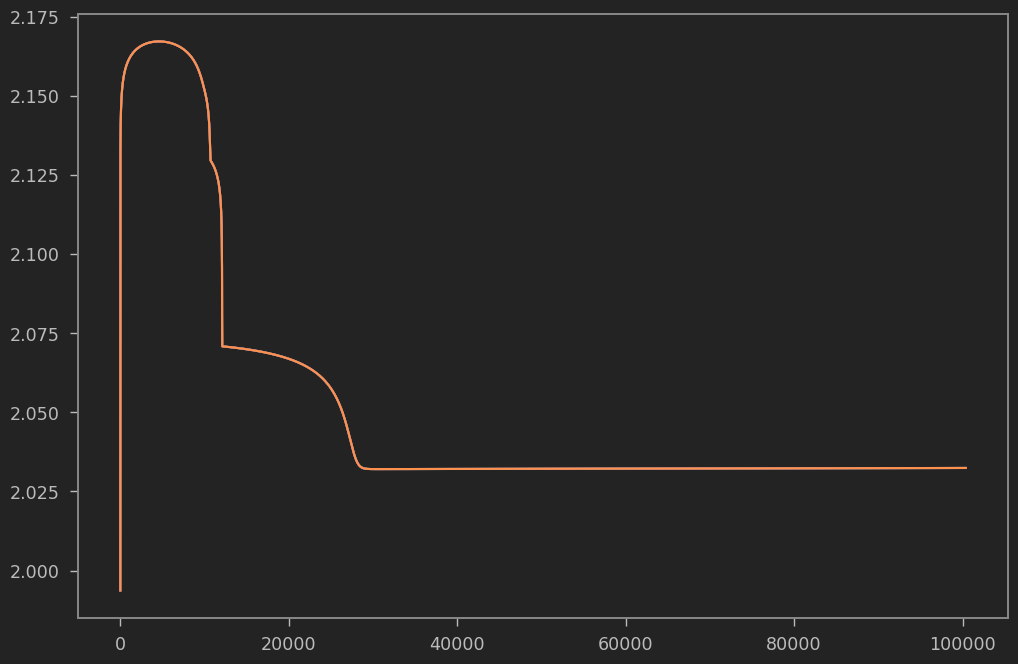

In [32]:

Rs0 = sim0.solution["Electrolyte Resistance [S-1]"].entries
V0 = sim0.solution["Terminal voltage [V]"].entries

E10 = sim0.solution["Reaction 1 potential [V]"].entries
E20 = sim0.solution["Reaction 2 potential [V]"].entries
E30 = sim0.solution["Reaction 3 potential [V]"].entries
E40 = sim0.solution["Reaction 4 potential [V]"].entries
E50 = sim0.solution["Reaction 5 potential [V]"].entries
E60 = sim0.solution["Reaction 6 potential [V]"].entries

eta20 = sim0.solution["Reaction 2 overpotential [V]"].entries
eta30 = sim0.solution["Reaction 3 overpotential [V]"].entries
eta40 = sim0.solution["Reaction 4 overpotential [V]"].entries
eta50 = sim0.solution["Reaction 5 overpotential [V]"].entries
eta60 = sim0.solution["Reaction 6 overpotential [V]"].entries
#plt.plot((E20 + eta20) + E10 + 3.45*Rs0)
plt.plot(E20 + eta20)
plt.plot(E30 + eta30)
plt.plot(E40 + eta40)
plt.plot(E50 + eta50)
plt.plot(E60 + eta60)

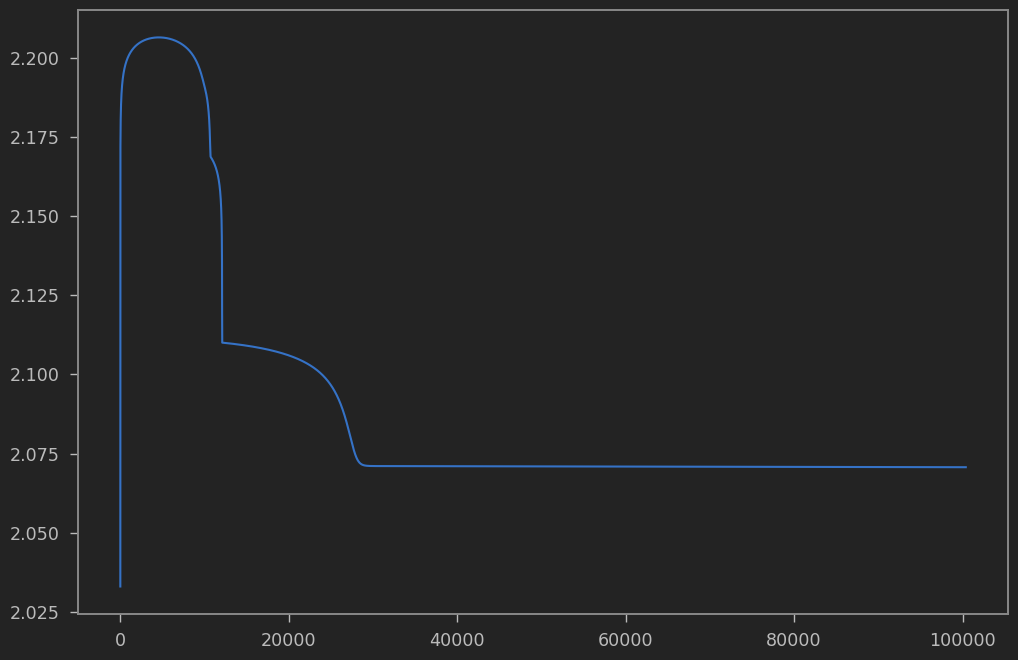

In [33]:
plt.plot(E20 + eta20 + E10)

In [16]:
initial_data0 = {}
for name in sim0.model.variable_names():
    initial_data0[name] = sim0.solution[name].data[-2]

In [20]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = -3.45
hours = 3
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data0['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data0['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data0['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data0['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data0['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data0['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data0['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 1.5e-5
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 10000))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

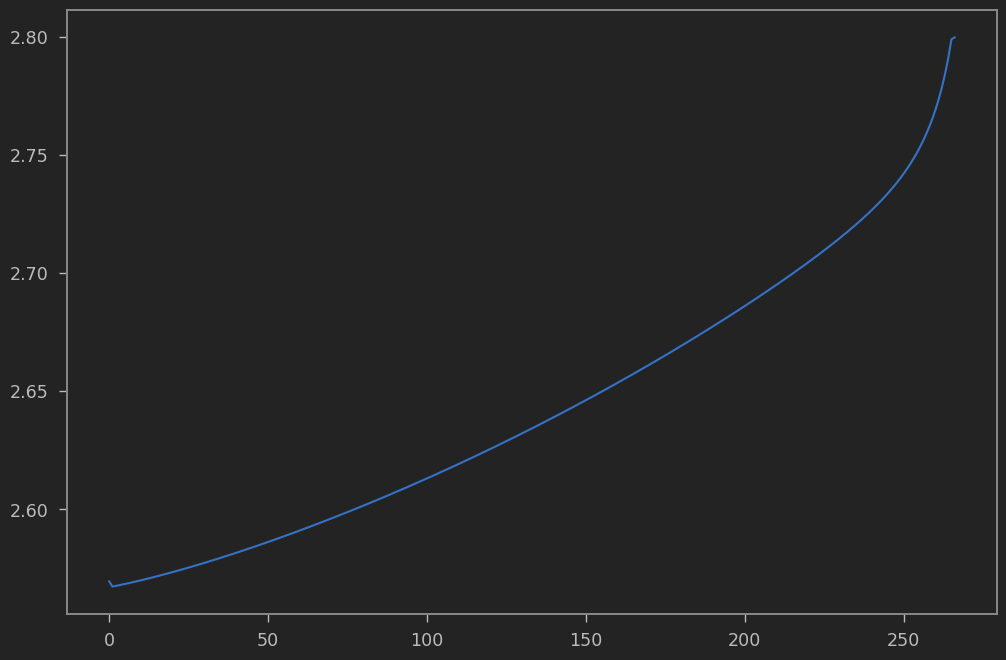

In [21]:
plt.plot(voltage)

In [9]:
pybamm.calculate_consistent_state(model, time=0, inputs=None)

AttributeError: module 'pybamm' has no attribute 'calculate_consistent_state'

In [19]:
for name in model.variable_names():
    print(name + ' ' + str(sim.solution[name].entries[1]))

Terminal voltage [V] 2.067945158368887
Current [A] 0.345
Discharge capacity [A.h] 1.181538899739583e-08
Time [s] 0.000123291015625
S8(s) [g] 670.0284659504124
S8 [g] 99.97120190697724
S6 [g] 8.176922416442025
S4 [g] 0.03371740949246397
S2 [g] 0.004931971154834011
S [g] 0.018805075952763296
Li [g] 1316.4111575600386
Cell Porosity [-] 0.65
Electrolyte Resistance [S-1] 0.13849538829122437
Conductivity [m.S-1] 0.0009959251075762968
Specific Surface Area [m-1] 100000.0
Reaction 2 potential [V] 2.355573025595734
Reaction 3 potential [V] 2.0818500794589645
Reaction 4 potential [V] 1.8767734997077132
Reaction 5 potential [V] 1.868418564289341
Reaction 6 potential [V] 1.8174695912029062
Reaction 1 overpotential [V] 0.0
Reaction 2 overpotential [V] -0.24690653151833325
Reaction 3 overpotential [V] 0.026816414618436202
Reaction 4 overpotential [V] 0.23189299436968747
Reaction 5 overpotential [V] 0.24024792978805976
Reaction 6 overpotential [V] 0.2911969028744945
Reaction 2 current [A] 244.8181154

In [25]:
sim.parameter_values

{'Active reaction area per cell [m2]': 0.96,
 'Ambient Temperature [K]': 298.0,
 'Apparent Geometric Area [m2]': 0.29,
 'Bruggeman Constant [-]': 6.0,
 'Cell Thickness [m]': 4e-05,
 'Cell heat capacity [J.g-1.K-1]': 2.0,
 'Cell heat transfer coefficient [W.K-1]': 0.2,
 'Cell mass [g]': 0.129,
 'Cell mass [kg]': 129.0,
 'Conductivity Relation Slope [S.m2.mol]': 4.6e-07,
 'Current function [A]': 0.345,
 'Density of precipitated Sulfur [g.L-1]': 2000.0,
 'Electrolyte volume per cell [L]': 0.0114,
 'Electron number per reaction [electrons]': 4.0,
 'Exchange current density H [A.m-2]': 10.0,
 'Exchange current density L [A.m-2]': 5.0,
 'Initial Cell Porosity [-]': 0.65,
 'Initial Cell Temperature [K]': 298.0,
 'Initial Condition for Precipitated Sulfur [g]': 2.7000000000000004e-06,
 'Initial Condition for S ion [g]': 8.830728523107219e-10,
 'Initial Condition for S2 ion [g]': 0.002697299116926997,
 'Initial Condition for S4 ion [g]': 0.0027,
 'Initial Condition for S8 ion [g]': 2.6946000000

In [4]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .345
hours = .0025
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Precipitation rate [s-1]" : 1.5e-5,
        "Zhang Initial Condition for Reaction 2 overpotential [V]":  0*0.317095133318479,
        #"Initial Li Concentration [g]": 216.41121602799998 
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-6, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 10))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


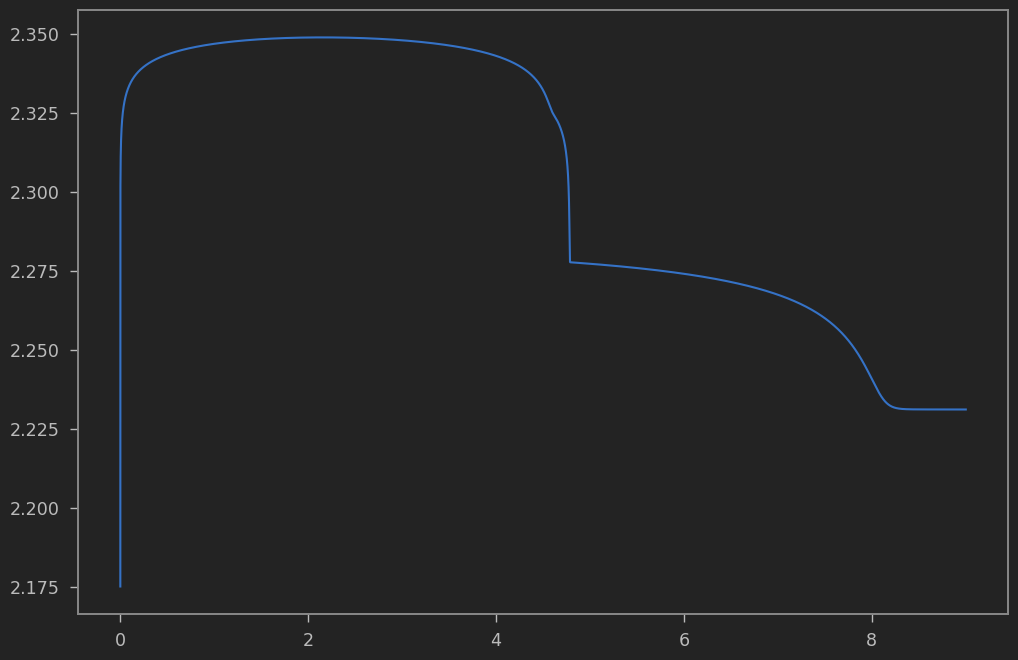

In [5]:
plt.plot(sim.solution.t, voltage)

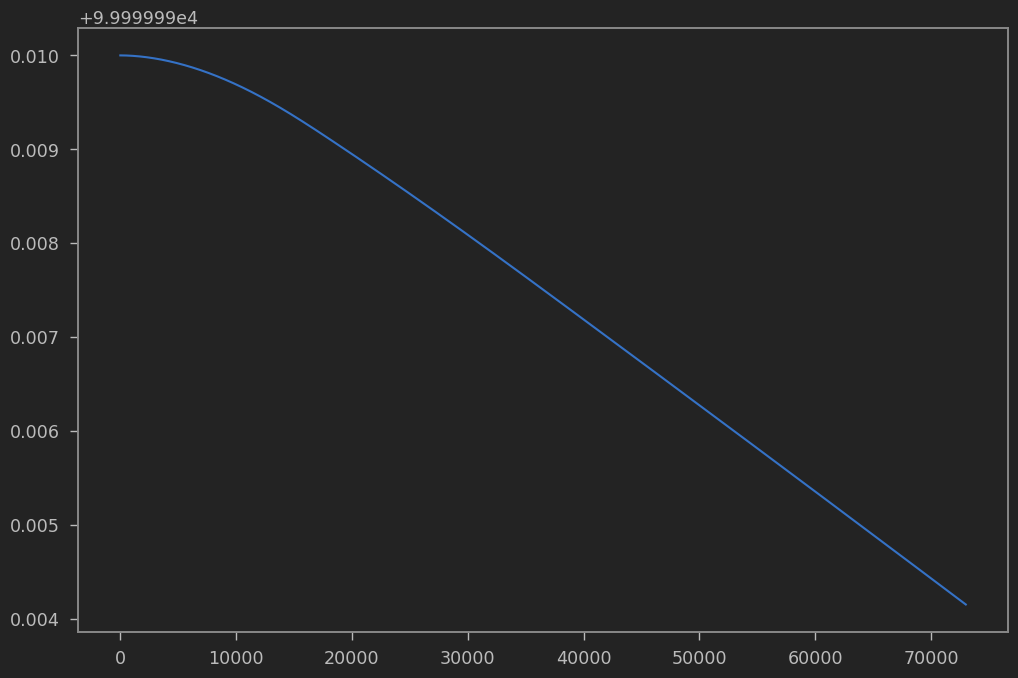

In [10]:
plt.plot(sim.solution["Specific Surface Area [m-1]"].entries)

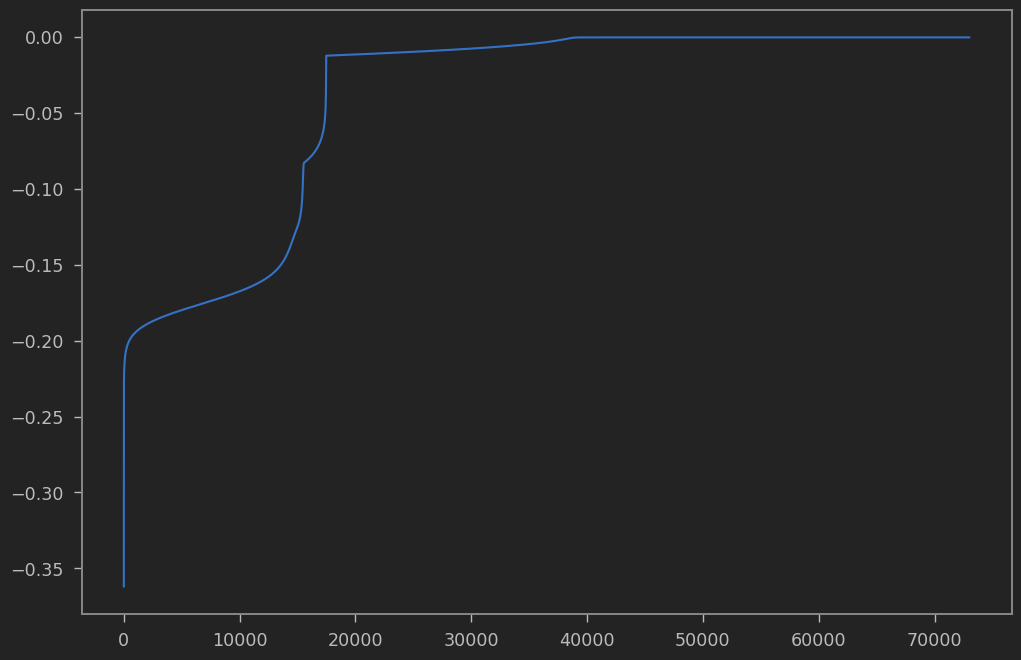

In [11]:
plt.plot(sim.solution["Reaction 2 overpotential [V]"].entries)

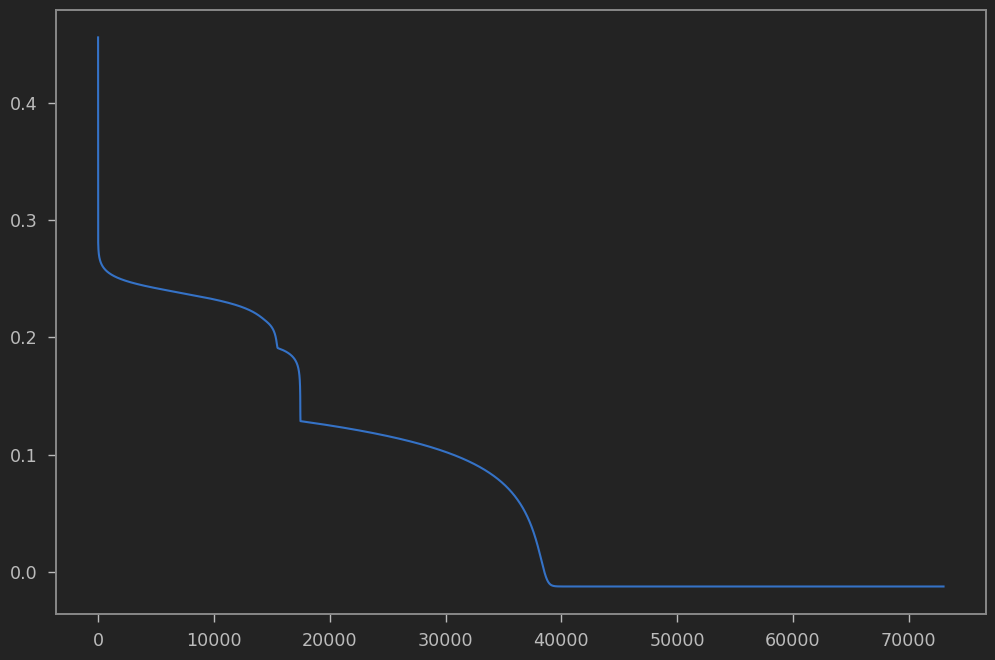

In [12]:
plt.plot(sim.solution["Reaction 6 overpotential [V]"].entries)

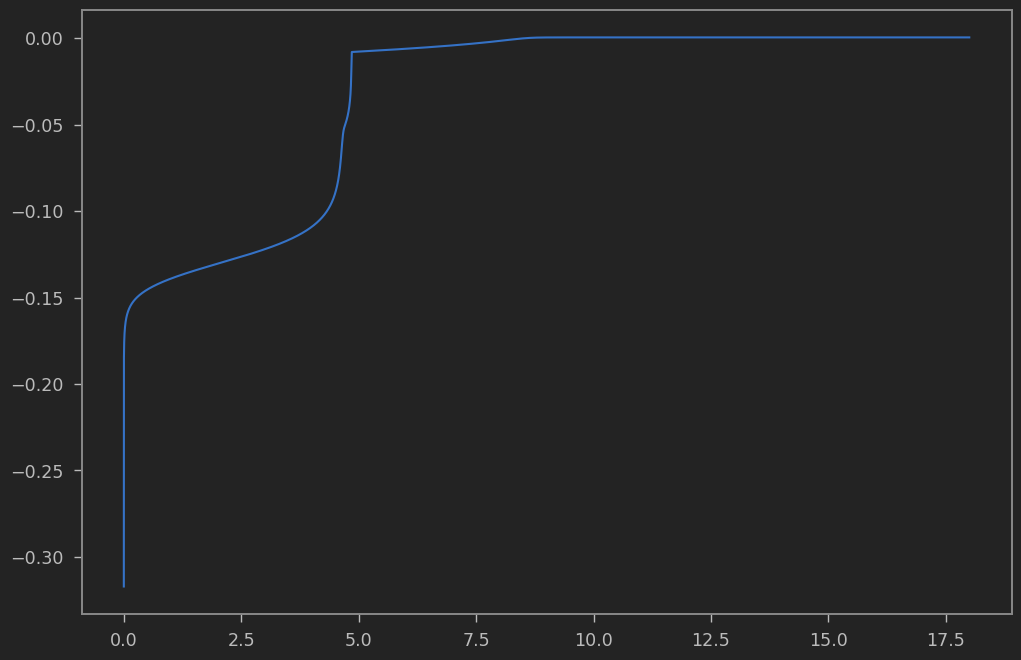

In [28]:
plt.plot(sim.solution.t, sim.solution["Reaction 2 overpotential [V]"].entries)

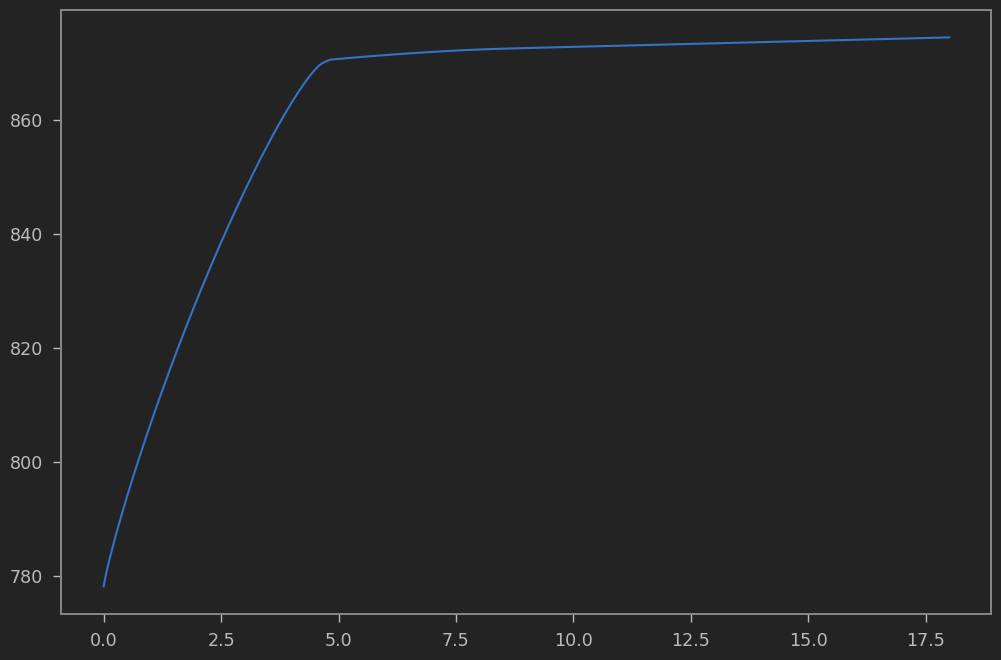

In [29]:
S8s = sim.solution['S8(s) [g]'].entries
S8 = sim.solution['S8 [g]'].entries
S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries

plt.plot(sim.solution.t, S8s + S8 + S6 + S4 + S2 + S1)

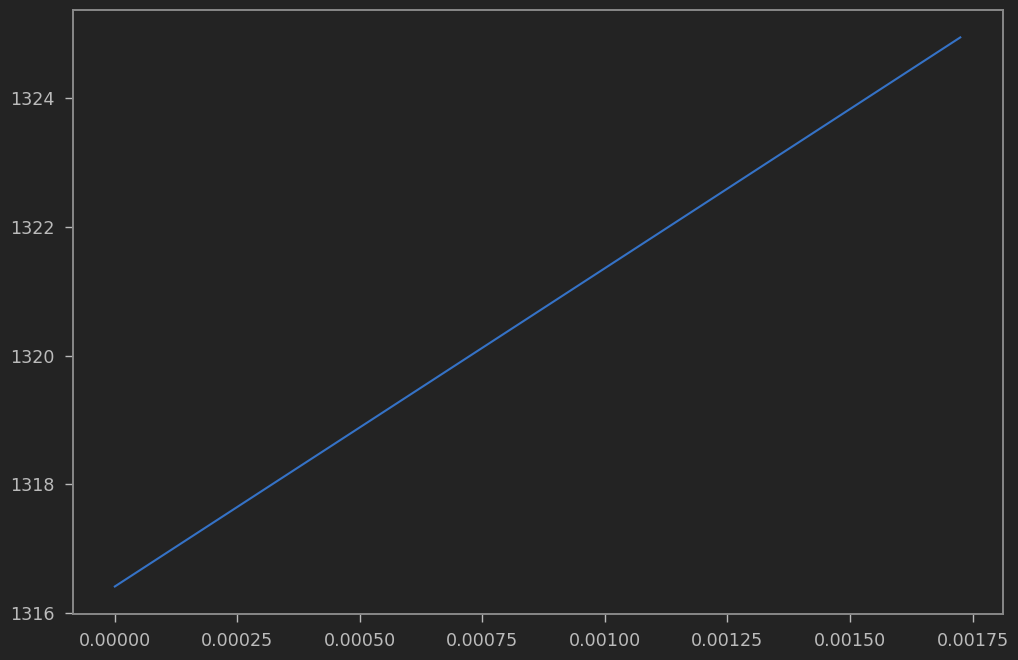

In [30]:
Li = sim.solution['Li [g]'].entries
plt.plot(abs(current)*sim.solution.t/3600, Li)

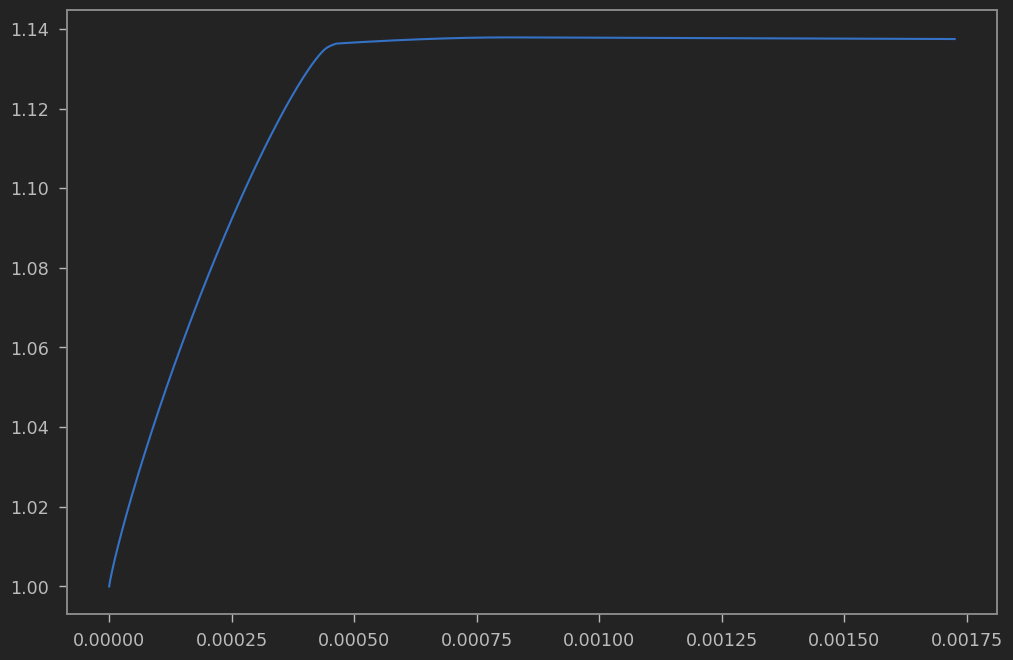

In [31]:
S8s = sim.solution['S8(s) [g]'].entries
S8 = sim.solution['S8 [g]'].entries
S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
capacity = sim.solution.t*abs(current)/3600
plt.plot(capacity, S8s/S8s[0] )
#plt.plot(capacity, S8/S8[0] )
#plt.plot(capacity, S6/S6[0] )
#plt.plot(capacity, S4/S4[0] )
#plt.plot(capacity, S2/S2[0] )
#plt.plot(capacity, S1/S1[0] )

In [32]:
print(sim.solution["Reaction 2 current [A]"].entries[-1])
print(sim.solution["Reaction 3 current [A]"].entries[-1])
print(sim.solution["Reaction 4 current [A]"].entries[-1])
print(sim.solution["Reaction 5 current [A]"].entries[-1])
print(sim.solution["Reaction 6 current [A]"].entries[-1])


-0.037197007084954326
-0.012399001903269697
-0.024798001788625047
-0.07439388417232236
-0.14862589815421717


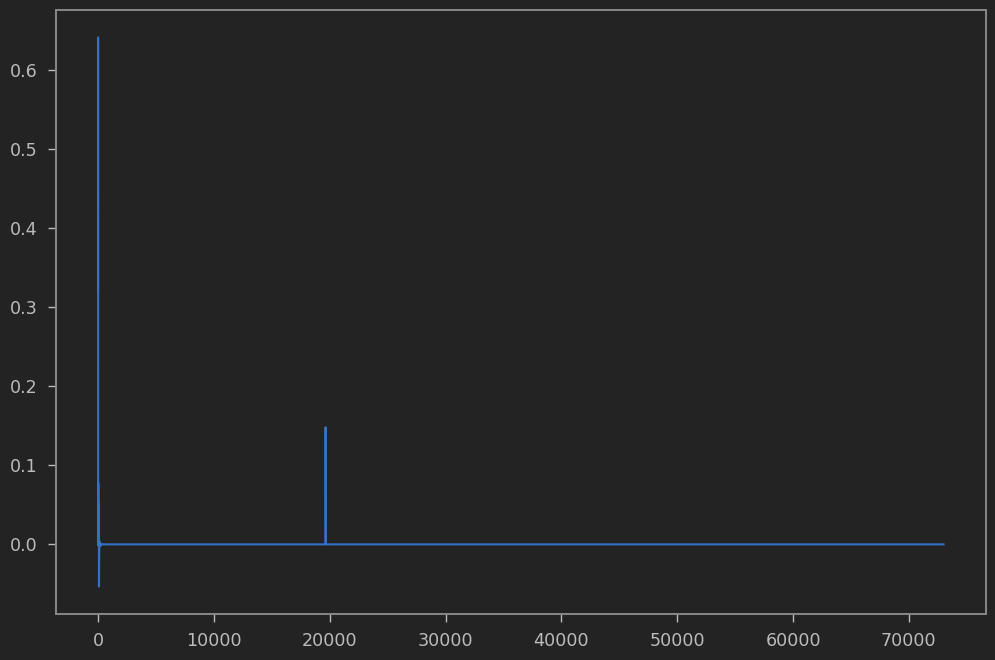

In [33]:
plt.plot(sim.solution["Algebraic condition"].entries[10:])

In [34]:
for name in sim.model.variable_names():
    print(name +" = "+str(sim.solution[name].data[-1]))

Terminal voltage [V] = 2.3421901855968548
Current [A] = -0.345
Discharge capacity [A.h] = -0.0017250000000010141
Time [s] = 18.0
S8(s) [g] = 762.0859071480637
S8 [g] = 5.285480781377501e-07
S6 [g] = 1.5440723639581963e-06
S4 [g] = 4.6151403696325215e-05
S2 [g] = 0.061356222903916874
S [g] = 112.41224829948649
Li [g] = 1324.9473054928292
Cell Porosity [-] = 0.65
Electrolyte Resistance [S-1] = 0.13878213383605542
Conductivity [m.S-1] = 0.000993867370894425
Active Surface Area [m2] = 100000.0
Reaction 2 potential [V] = 2.10921844071722
Reaction 3 potential [V] = 2.109483769512523
Reaction 4 potential [V] = 2.109059249184865
Reaction 5 potential [V] = 2.106514057757985
Reaction 6 potential [V] = 2.097100471481702
Reaction 1 overpotential [V] = 0.0
Reaction 2 overpotential [V] = 0.0004775962362783138
Reaction 3 overpotential [V] = 0.00021226744097502248
Reaction 4 overpotential [V] = 0.0006367877686330736
Reaction 5 overpotential [V] = 0.003181979195513218
Reaction 6 overpotential [V] = 0.0

In [35]:
initial_data0 = {}
for name in sim.model.variable_names():
    initial_data0[name] = sim.solution[name].data[-1]

In [36]:
initial_data0

{'Terminal voltage [V]': 2.3421901855968548,
 'Current [A]': -0.345,
 'Discharge capacity [A.h]': -0.0017250000000010141,
 'Time [s]': 18.0,
 'S8(s) [g]': 762.0859071480637,
 'S8 [g]': 5.285480781377501e-07,
 'S6 [g]': 1.5440723639581963e-06,
 'S4 [g]': 4.6151403696325215e-05,
 'S2 [g]': 0.061356222903916874,
 'S [g]': 112.41224829948649,
 'Li [g]': 1324.9473054928292,
 'Cell Porosity [-]': 0.65,
 'Electrolyte Resistance [S-1]': 0.13878213383605542,
 'Conductivity [m.S-1]': 0.000993867370894425,
 'Active Surface Area [m2]': 100000.0,
 'Reaction 2 potential [V]': 2.10921844071722,
 'Reaction 3 potential [V]': 2.109483769512523,
 'Reaction 4 potential [V]': 2.109059249184865,
 'Reaction 5 potential [V]': 2.106514057757985,
 'Reaction 6 potential [V]': 2.097100471481702,
 'Reaction 1 overpotential [V]': 0.0,
 'Reaction 2 overpotential [V]': 0.0004775962362783138,
 'Reaction 3 overpotential [V]': 0.00021226744097502248,
 'Reaction 4 overpotential [V]': 0.0006367877686330736,
 'Reaction 5 o

In [83]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = -.345
hours = 23
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data0['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data0['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data0['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data0['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data0['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data0['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data0['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 0*1.5e-5
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

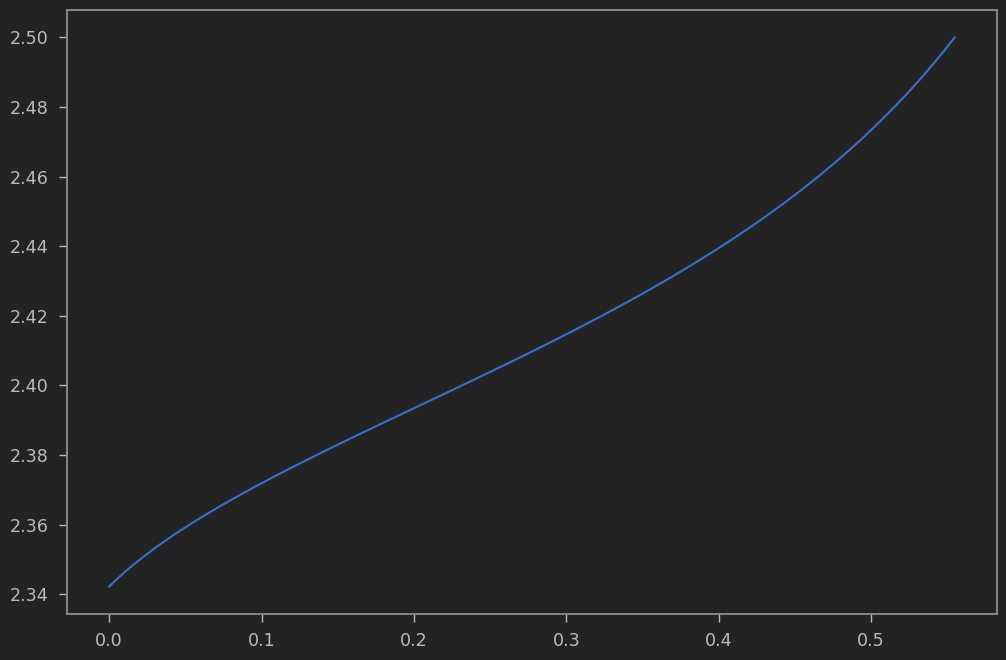

In [84]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

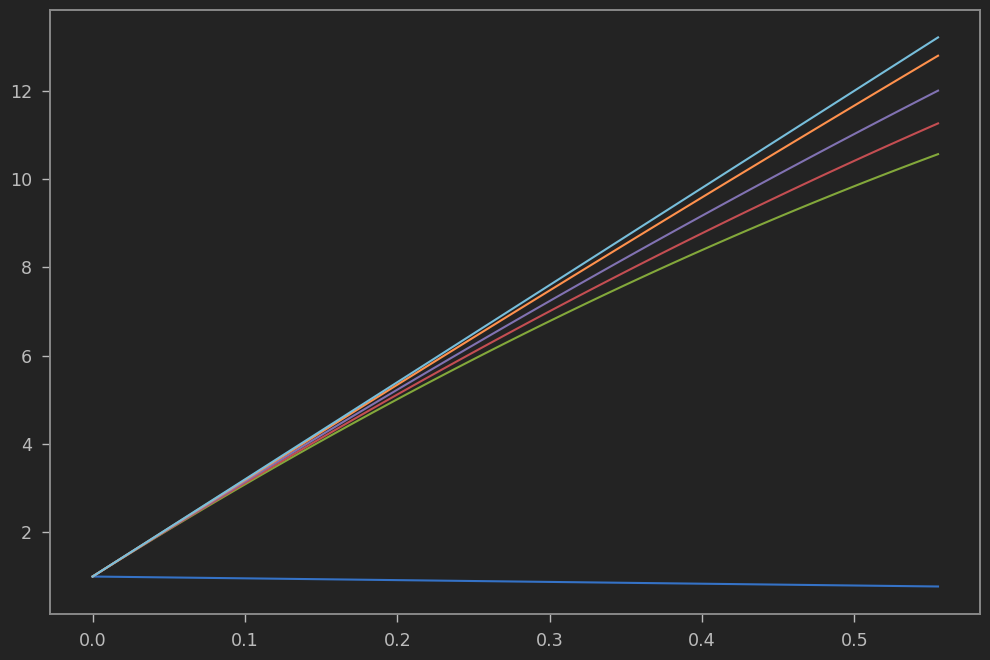

In [85]:
S8s = sim.solution['S8(s) [g]'].entries
S8 = sim.solution['S8 [g]'].entries
S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
capacity = sim.solution.t*abs(current)/3600
plt.plot(capacity, S8s/S8s[0] )
plt.plot(capacity, S8/S8[0] )
plt.plot(capacity, S6/S6[0] )
plt.plot(capacity, S4/S4[0] )
plt.plot(capacity, S2/S2[0] )
plt.plot(capacity, S1/S1[0] )

In [75]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .01
hours = 23
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data0['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data0['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data0['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data0['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data0['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data0['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data0['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 0*1.5e-5
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


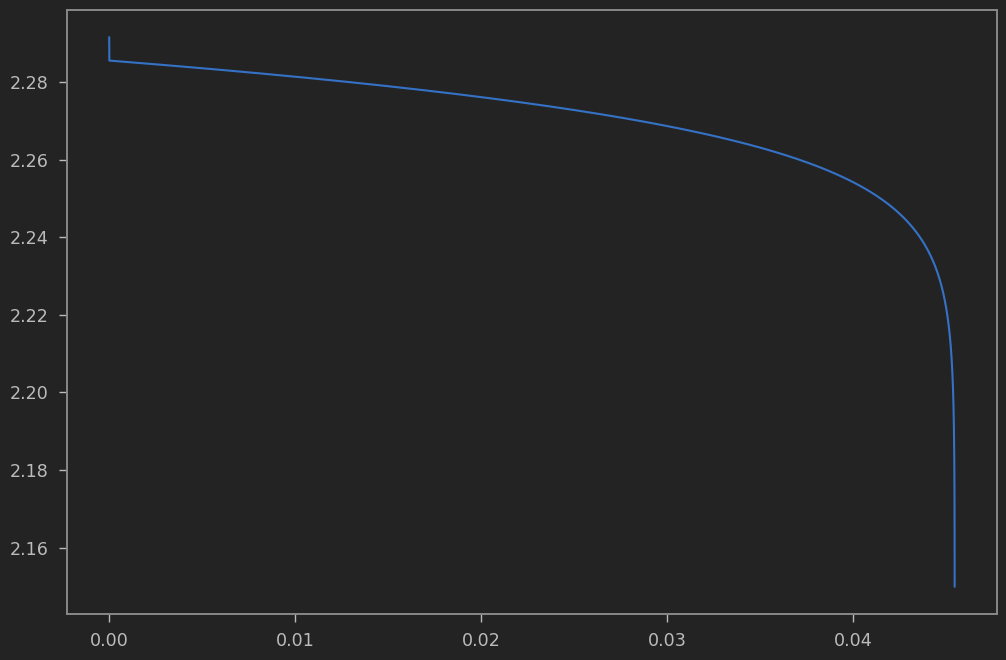

In [76]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

In [88]:
initial_data1 = {}
for name in sim.model.variable_names():
    initial_data1[name] = sim.solution[name].data[-2]

In [89]:
initial_data1

{'Terminal voltage [V]': 2.496235835110857,
 'Current [A]': -0.345,
 'Discharge capacity [A.h]': -0.5480630630630297,
 'Time [s]': 5718.918918918919,
 'S8(s) [g]': 592.4921565895517,
 'S8 [g]': 5.5369163640003184e-06,
 'S6 [g]': 1.7225877924269783e-05,
 'S4 [g]': 0.0005483136444229515,
 'S2 [g]': 0.7763091788592882,
 'S [g]': 1467.7302040488867,
 'Li [g]': 4037.0141686083693,
 'Cell Porosity [-]': 0.65,
 'Electrolyte Resistance [S-1]': 0.4055692381085537,
 'Conductivity [m.S-1]': 0.00034009244667082057,
 'Active Surface Area [m2]': 100000.0,
 'Reaction 2 potential [V]': 2.1426120163053004,
 'Reaction 3 potential [V]': 2.142877335459614,
 'Reaction 4 potential [V]': 2.1424528305297628,
 'Reaction 5 potential [V]': 2.1399077303272156,
 'Reaction 6 potential [V]': 2.1304935829040184,
 'Reaction 1 overpotential [V]': 0.0,
 'Reaction 2 overpotential [V]': 0.00047757888774533556,
 'Reaction 3 overpotential [V]': 0.00021225973343197424,
 'Reaction 4 overpotential [V]': 0.000636764663282996,
 

In [98]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .035
hours = 23
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data1['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data1['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data1['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data1['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data1['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data1['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": .2,#0*initial_data1['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 1.5e-5
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 98.8152 and h = 1.19209e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/ida

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

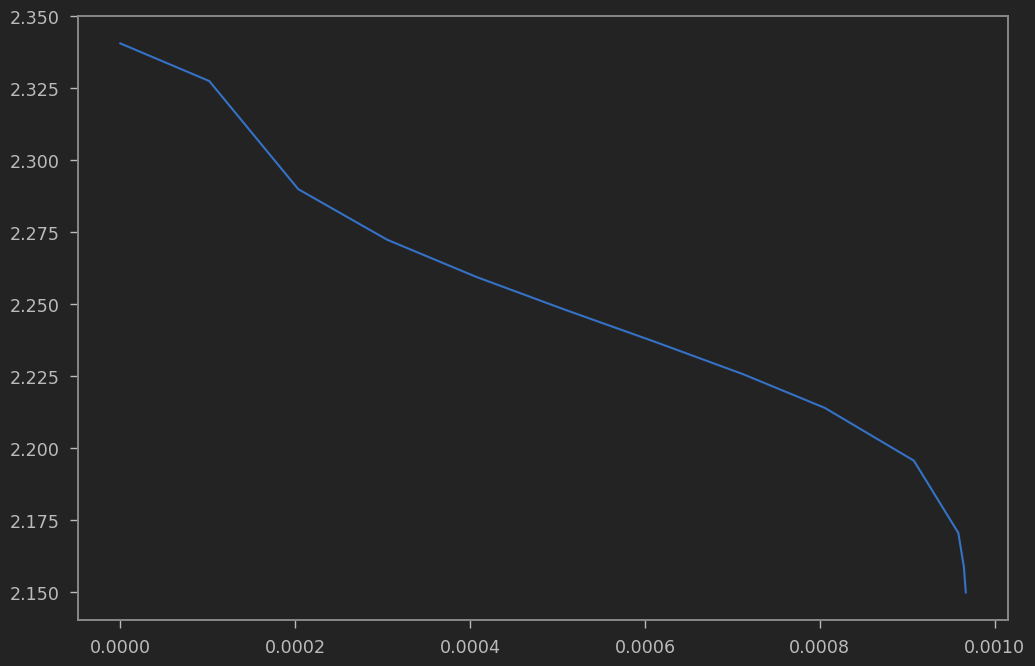

In [99]:
plt.plot(abs(current)*sim.solution.t/3600, voltage)

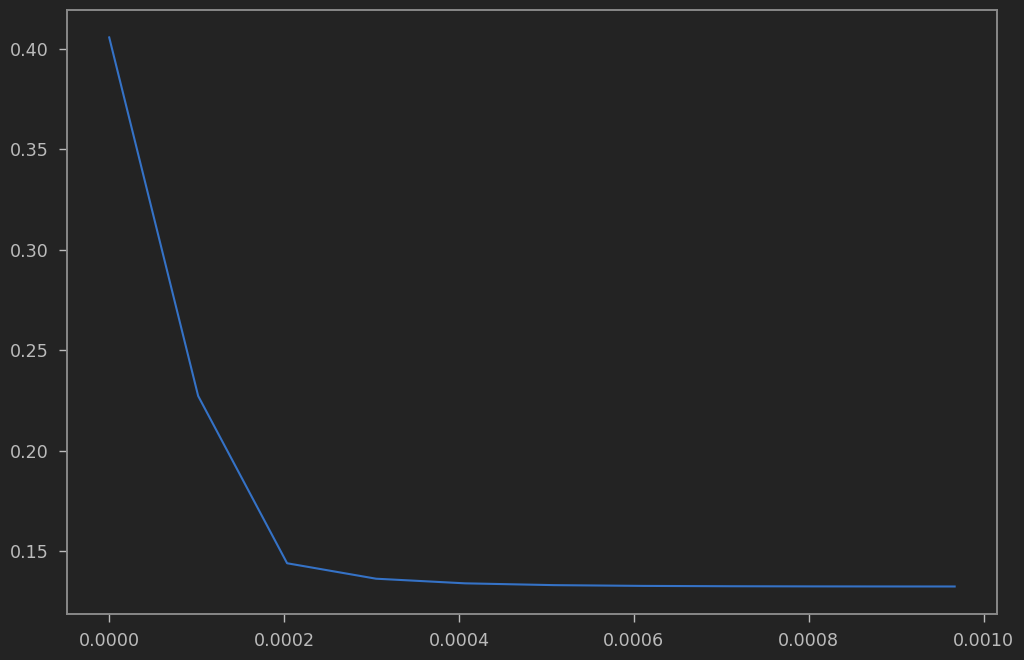

In [100]:

plt.plot(abs(current)*sim.solution.t/3600, sim.solution["Electrolyte Resistance [S-1]"].entries)

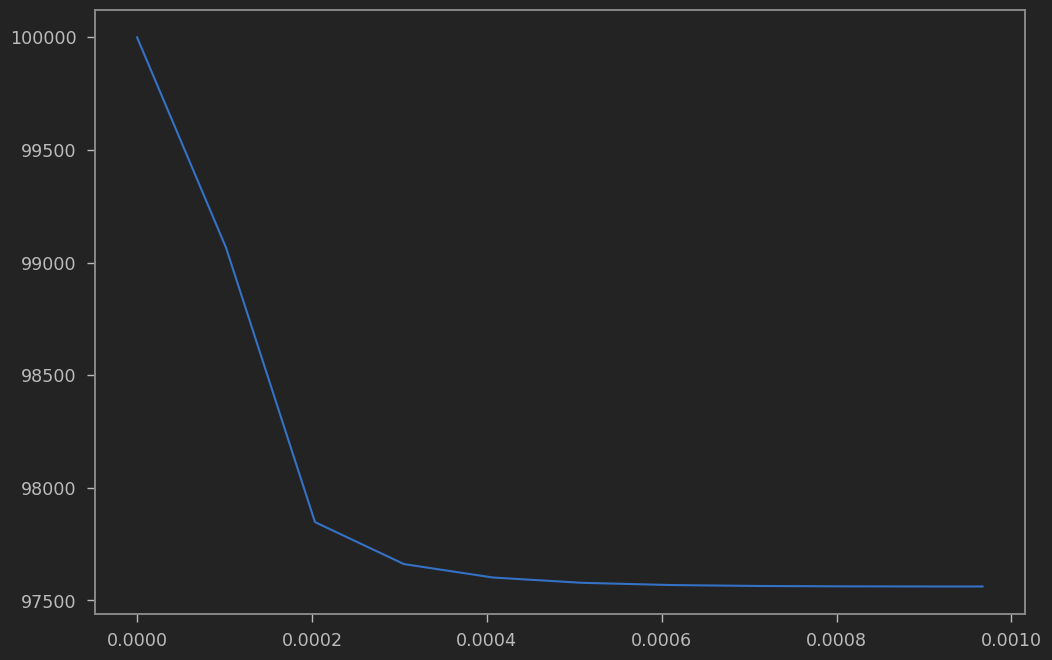

In [101]:

plt.plot(abs(current)*sim.solution.t/3600, sim.solution["Active Surface Area [m2]"].entries)

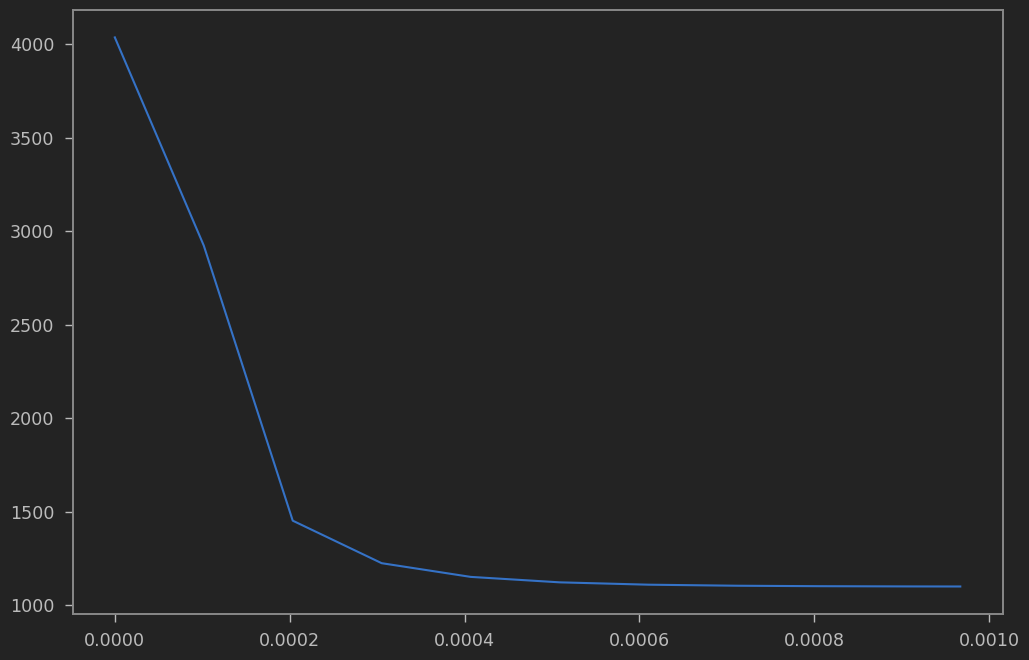

In [102]:
plt.plot(abs(current)*sim.solution.t/3600, sim.solution[ "Li [g]"].entries)

In [135]:
initial_data1 = {}
for name in sim.model.variable_names():
    initial_data1[name] = sim.solution[name].data[-50]

In [136]:
initial_data1

{'Terminal voltage [V]': 2.4089388767905935,
 'Current [A]': -0.1,
 'Discharge capacity [A.h]': -0.6423423423460991,
 'Time [s]': 23124.324324324323,
 'S8(s) [g]': 563.7265844342397,
 'S8 [g]': 4.230707870144908e-06,
 'S6 [g]': 1.3278121846649273e-05,
 'S4 [g]': 0.00042972790068641215,
 'S2 [g]': 0.6636936350969398,
 'S [g]': 1698.0803380783377,
 'Li [g]': 3397.48895790033,
 'Cell Porosity [-]': 0.65,
 'Electrolyte Resistance [S-1]': 0.6020830896159748,
 'Conductivity [m.S-1]': 0.00022908970017864952,
 'Active Surface Area [m2]': 100000.0,
 'Reaction 2 potential [V]': 2.139796240696565,
 'Reaction 3 potential [V]': 2.1398731359934176,
 'Reaction 4 potential [V]': 2.139750103665919,
 'Reaction 5 potential [V]': 2.139011957432891,
 'Reaction 6 potential [V]': 2.136249584193263,
 'Reaction 1 overpotential [V]': 0.0,
 'Reaction 2 overpotential [V]': 0.00013841164041632285,
 'Reaction 3 overpotential [V]': 6.151634356355018e-05,
 'Reaction 4 overpotential [V]': 0.00018454867106232342,
 'Rea

In [140]:
model1 = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .01
hours = 23
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model1.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data1['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data1['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data1['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data1['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data1['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data1['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data1['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 0*1.5e-5
    }
)
params.process_model(model1)
sim1 = pybamm.Simulation(
    model1,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 1000))
voltage1 = sim1.solution['Terminal voltage [V]'].entries
notify

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


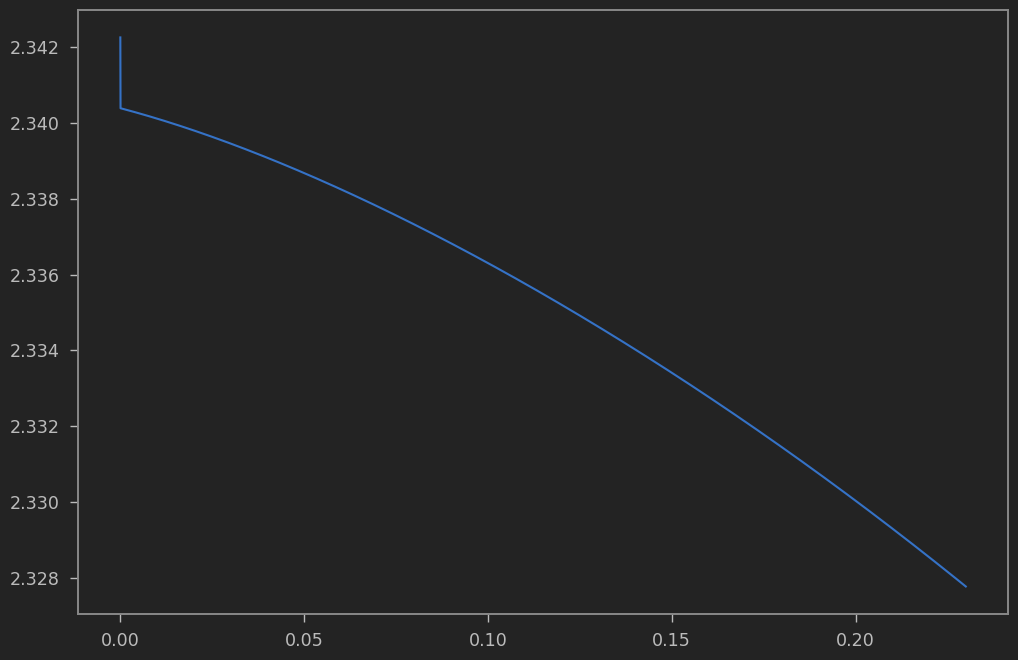

In [141]:
plt.plot(abs(current)*sim1.solution.t/3600, voltage1)

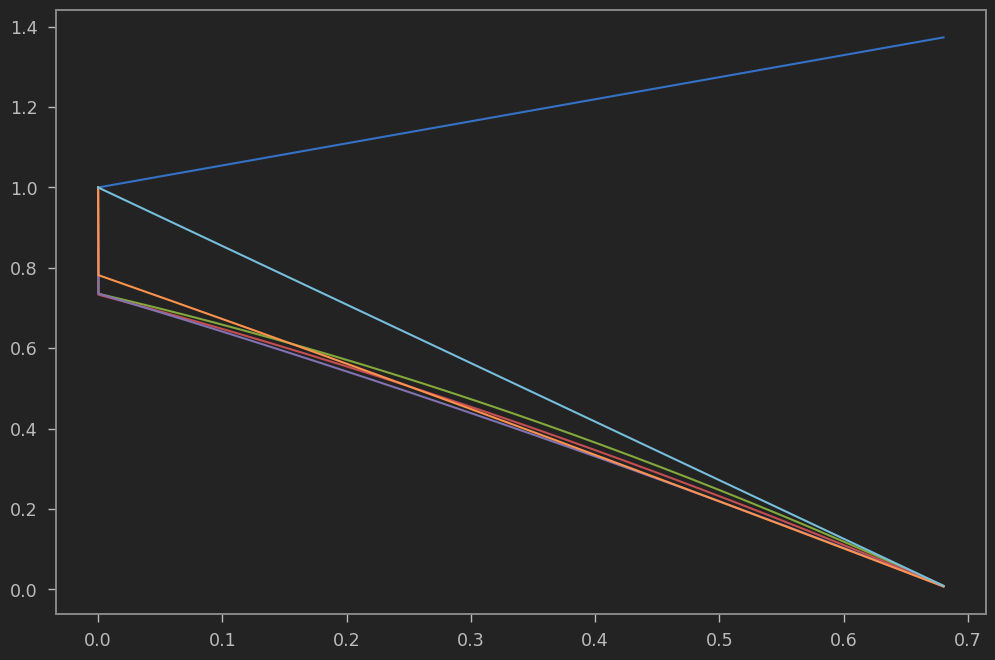

In [139]:
S8s = sim1.solution['S8(s) [g]'].entries
S8 = sim1.solution['S8 [g]'].entries
S6 = sim1.solution['S6 [g]'].entries
S4 = sim1.solution['S4 [g]'].entries
S2 = sim1.solution['S2 [g]'].entries
S1 = sim1.solution['S [g]'].entries
capacity = sim1.solution.t*abs(current)/3600
plt.plot(capacity, S8s/S8s[0] )
plt.plot(capacity, S8/S8[0] )
plt.plot(capacity, S6/S6[0] )
plt.plot(capacity, S4/S4[0] )
plt.plot(capacity, S2/S2[0] )
plt.plot(capacity, S1/S1[0] )

In [49]:
model = pybamm.lithium_sulfur.ZhangEtAl2015()
current = -.1
hours = 20
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data0['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data0['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data0['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data0['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data0['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data0['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data0['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 1.5e-5
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 1000))
voltage = sim.solution['Terminal voltage [V]'].entries
notify

The linesearch algorithm failed with too small a step.
At t = 0 and h = 1.82198e-11, the error test failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
At t = 0 and h = 1.81979e-11, the error test failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


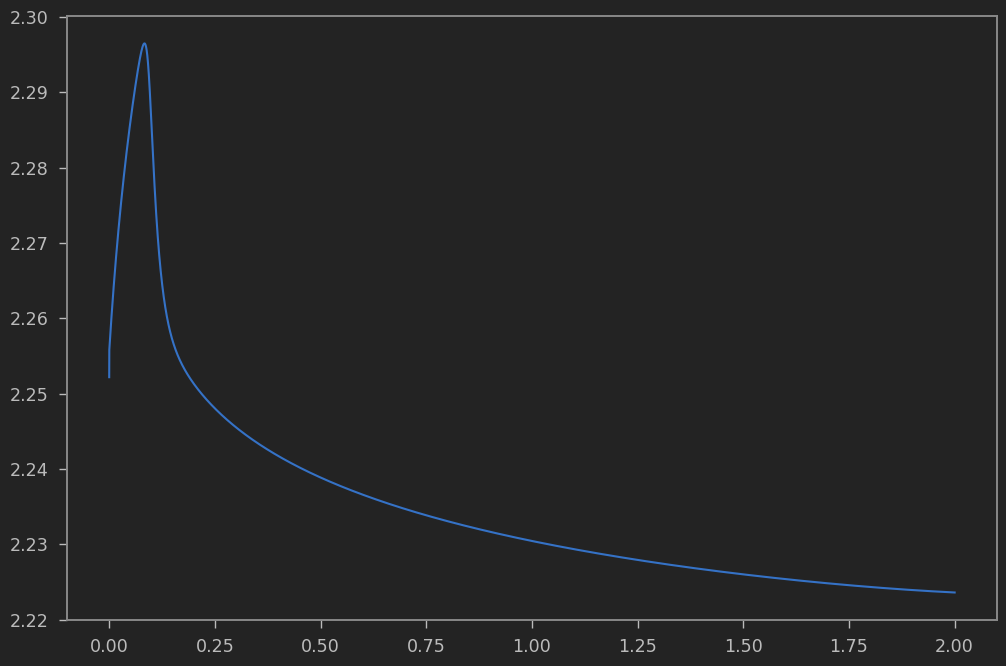

In [50]:
plt.plot(abs(current)*sim.solution.t/3600,voltage)

In [51]:
initial_data = {}
for name in sim.model.variable_names():
    initial_data[name] = sim.solution[name].data[-10]

In [52]:
initial_data

{'Terminal voltage [V]': 2.223603053765686,
 'Current [A]': -0.1,
 'Discharge capacity [A.h]': -1.999862049559325,
 'Time [s]': 71995.03378378431,
 'S8(s) [g]': 146.318874503795,
 'S8 [g]': 3.3717707764071146e-08,
 'S6 [g]': 1.4827945275378245e-07,
 'S4 [g]': 6.7222552761123225e-06,
 'S2 [g]': 0.014506634452825377,
 'S [g]': 43.45505429816948,
 'Li [g]': 86.93913567374948,
 'Cell Porosity [-]': 0.6408777499048532,
 'Electrolyte Resistance [S-1]': 0.13716438451634552,
 'Conductivity [m.S-1]': 0.0010055892786536126,
 'Active Surface Area [m2]': 91869.43041641175,
 'Reaction 2 potential [V]': 2.095071010797231,
 'Reaction 3 potential [V]': 2.095154679982088,
 'Reaction 4 potential [V]': 2.095020809463799,
 'Reaction 5 potential [V]': 2.0942176468172584,
 'Reaction 6 potential [V]': 2.091209546730637,
 'Reaction 1 overpotential [V]': 0.0,
 'Reaction 2 overpotential [V]': 0.00015060467133113953,
 'Reaction 3 overpotential [V]': 6.69354864744065e-05,
 'Reaction 4 overpotential [V]': 0.000200

In [55]:
model1 = pybamm.lithium_sulfur.ZhangEtAl2015()
current = -.1
hours = 20
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 1.5e-5,
        "Upper voltage cut-off [V]": 2.4
    }
)
params.process_model(model1)
sim1 = pybamm.Simulation(
    model1,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 1000))
voltage = sim1.solution['Terminal voltage [V]'].entries
notify

Newton/Linesearch algorithm failed to converge.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 17031.5 and h = 8.58307e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 17031.6 and h = 6.80562e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 17031.6 and h = 6.80648e-10, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

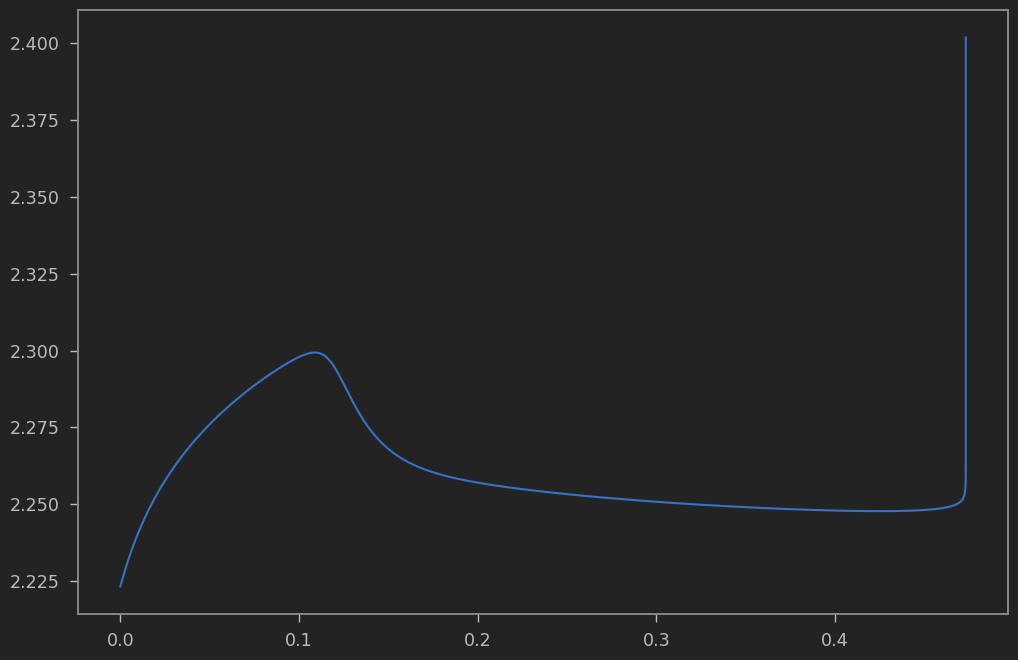

In [56]:
plt.plot(abs(current)*sim1.solution.t/3600,voltage)

In [57]:
initial_data2 = {}
for name in sim1.model.variable_names():
    initial_data2[name] = sim1.solution[name].data[-1]

In [59]:
initial_data2

{'Terminal voltage [V]': 2.401824572107986,
 'Current [A]': -0.1,
 'Discharge capacity [A.h]': -0.47310317830181847,
 'Time [s]': 17031.714418858035,
 'S8(s) [g]': 2.7977396239467143e-41,
 'S8 [g]': 2.57801041614488e-45,
 'S6 [g]': 5.5369981039846955e-34,
 'S4 [g]': 1.2015726286920697e-21,
 'S2 [g]': 1.2803899817410428e-07,
 'S [g]': 71.54519633602095,
 'Li [g]': 143.0903929281199,
 'Cell Porosity [-]': 0.6479202517621598,
 'Electrolyte Resistance [S-1]': 0.13673608088984668,
 'Conductivity [m.S-1]': 0.0010087391241955705,
 'Active Surface Area [m2]': 98095.52332253507,
 'Reaction 2 potential [V]': 2.260690607965048,
 'Reaction 3 potential [V]': 2.2618555811094567,
 'Reaction 4 potential [V]': 2.260947838913805,
 'Reaction 5 potential [V]': 2.26094286348008,
 'Reaction 6 potential [V]': 2.2534405775564954,
 'Reaction 1 overpotential [V]': 0.0,
 'Reaction 2 overpotential [V]': 8.651917455907971e-14,
 'Reaction 3 overpotential [V]': -0.001164973144322179,
 'Reaction 4 overpotential [V]':

In [62]:
model2 = pybamm.lithium_sulfur.ZhangEtAl2015()
current = .01
hours = 20
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Zhang Initial Condition for solid S8 [g]": initial_data2['S8(s) [g]'],
        "Zhang Initial Condition for S8 ion [g]": initial_data2['S8 [g]'],
        "Zhang Initial Condition for S6 ion [g]": initial_data2['S6 [g]'],
        "Zhang Initial Condition for S4 ion [g]": initial_data2['S4 [g]'],
        "Zhang Initial Condition for S2 ion [g]": initial_data2['S2 [g]'],
        "Zhang Initial Condition for S ion [g]": initial_data2['S [g]'],
        "Zhang Initial Condition for Reaction 2 overpotential [V]": initial_data2['Reaction 2 overpotential [V]'],
        "Precipitation rate [s-1]" : 1.5e-5,
        "Upper voltage cut-off [V]": 2.4
    }
)
params.process_model(model2)
sim2 = pybamm.Simulation(
    model2,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15
    ),
)
sim2.solve(np.linspace(0, time_in_seconds, 10000))
voltage = sim1.solution['Terminal voltage [V]'].entries
notify

At t = 2.18676 and h = 4.76837e-08, the corrector convergence failed repeatedly or with |h| = hmin.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian 

SolverError: Maximum number of decreased steps occurred at t=3.636363636365495. Try solving the model up to this time only or reducing dt_max (currently, dt_max=0.00011097301136369309).

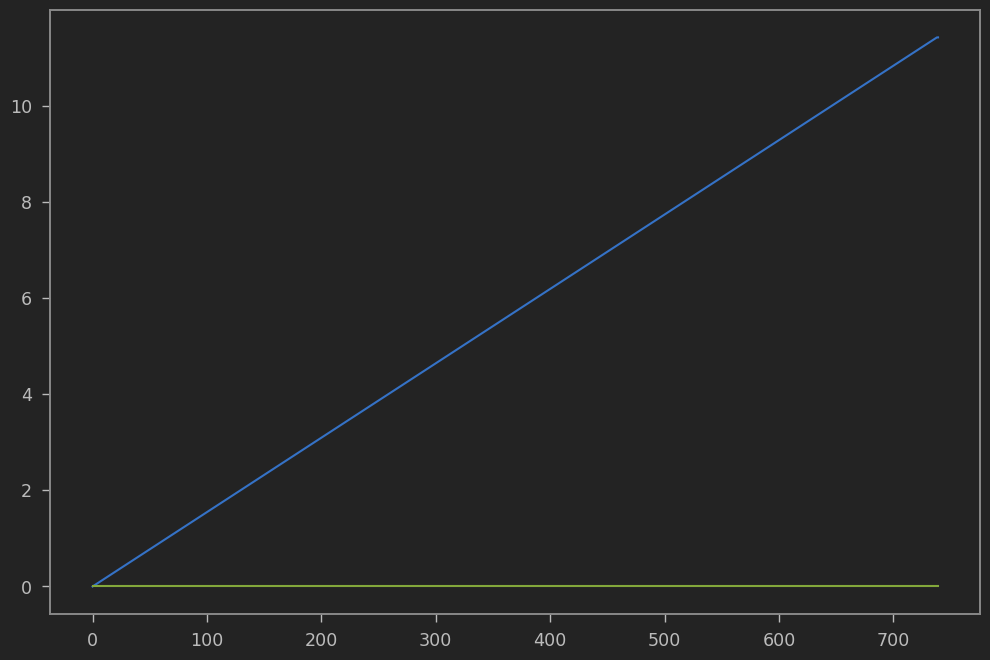

In [11]:
plt.plot(sim.solution['S8(s) [g]'].data - sim.solution['S8(s) [g]'].data[0])
plt.plot(sim.solution['S8 [g]'].data - sim.solution['S8 [g]'].data[0])

#plt.plot(sim.solution['S8 [g]'].data)
#plt.plot(sim.solution['S6 [g]'].data)
#plt.plot(sim.solution['S4 [g]'].data)
#plt.plot(sim.solution['S2 [g]'].data)
#plt.plot(sim.solution['S [g]'].data)
#plt.plot(sim.solution['Li [g]'].data)

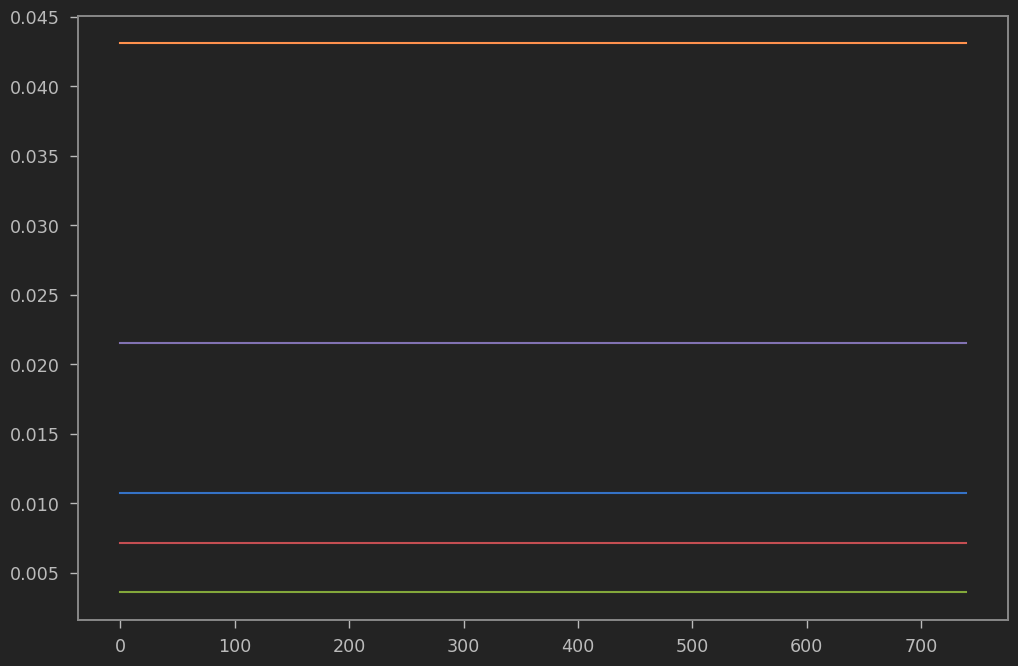

In [12]:

plt.plot(sim.solution['Reaction 2 current [A]'].data)
plt.plot(sim.solution['Reaction 3 current [A]'].data)
plt.plot(sim.solution['Reaction 4 current [A]'].data)
plt.plot(sim.solution['Reaction 5 current [A]'].data)
plt.plot(sim.solution['Reaction 6 current [A]'].data)


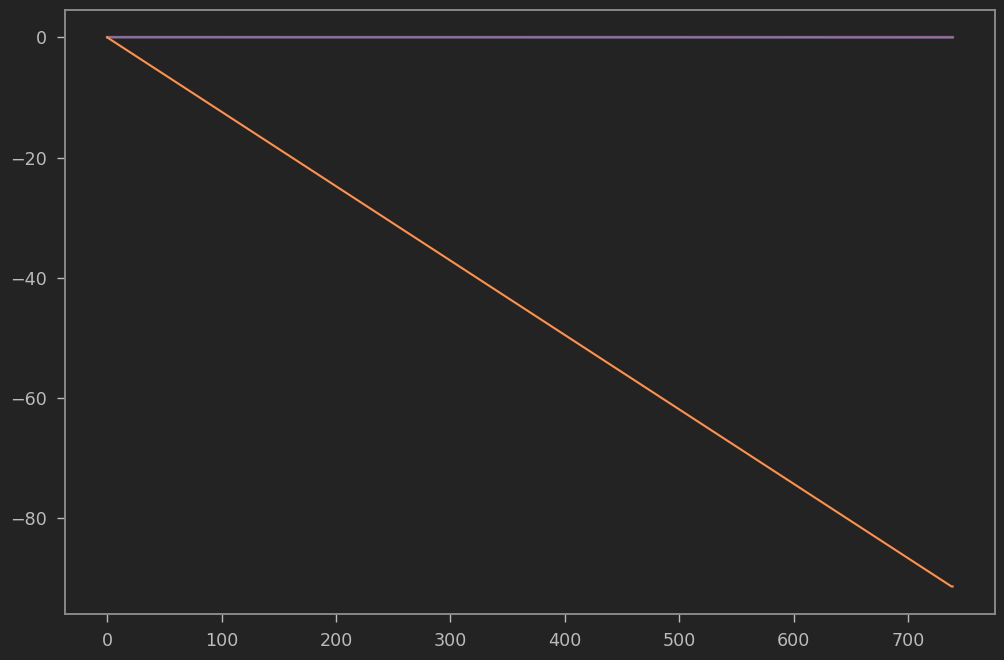

In [13]:
plt.plot(sim.solution['S8 [g]'].data -sim.solution['S8 [g]'].data[0] )
plt.plot(sim.solution['S6 [g]'].data - sim.solution['S6 [g]'].data[0])
plt.plot(sim.solution['S4 [g]'].data - sim.solution['S4 [g]'].data[0])
plt.plot(sim.solution['S2 [g]'].data - sim.solution['S2 [g]'].data[0])
plt.plot(sim.solution['S [g]'].data - sim.solution['S [g]'].data[0])